#**1. Data Overview**

In [336]:
# Base libraries
import math
import numpy as np
import pandas as pd
import kagglehub

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Statistics
from scipy import stats
from scipy.stats import chi2_contingency

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# Data handling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc,
    precision_recall_curve, average_precision_score
)

# Survival analysis
from lifelines import KaplanMeierFitter

##**1.1 Dataset Source**

Dataset is obtained from Kaggle: **«HR Analytics. Employee Attrition Dataset»** (available [here](https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction)).

In [424]:
path = kagglehub.dataset_download("rishikeshkonapure/hr-analytics-prediction")

csv_path = os.path.join(path, "HR-Employee-Attrition.csv")
df = pd.read_csv(csv_path)

Using Colab cache for faster access to the 'hr-analytics-prediction' dataset.


*Note:* The original dataset was published by IBM as *“IBM HR Analytics Employee Attrition & Performance”* and largely duplicates this version. You can view it here: [IBM HR Analytics Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).

##**1.2 Dataset Structure and Descriptive Statistics**

In [338]:
df.shape

(1470, 35)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [340]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [341]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [342]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

##**1.3 Feature Analysis Functions**

Custom functions implemented for consistent EDA:
- info_feat() - statistical summary per feature
- bar_plot_by_target() - categorical distribution segmented by target variable
- pie_plot() - proportional distributions
- box_plot() - outlier and spread analysis
- hist_plot() - numeric distributions
- boxplot_by_target() - numeric distribution grouped by target
- detect_skew_type() - skewness diagnostics

In [427]:
def info_feat(df,feature):
  print('Description:\n{}'.format(df[feature].describe()))


def bar_plot_by_target(df, feature, target='Attrition'):
    crosstab = pd.crosstab(df[feature], df[target], dropna=False)

    if pd.api.types.is_numeric_dtype(df[feature]):
        crosstab = crosstab.sort_index()
    else:
        crosstab['total'] = crosstab.sum(axis=1)
        crosstab = crosstab.sort_values('total', ascending=False)
        crosstab = crosstab.drop(columns='total')

    if 'Yes' in crosstab.columns and 'No' in crosstab.columns:
        crosstab = crosstab[['Yes', 'No']]

    colors = plt.cm.tab10(range(len(crosstab.columns)))
    ax = crosstab.plot(kind='bar', stacked=True, color=colors, figsize=(4,6))
    plt.title(f"{feature} count", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.legend(labels=crosstab.columns, title=target)

    plt.tight_layout()
    plt.show()


def pie_plot(df, feature):
    freqs = df[feature].value_counts(dropna=False)
    colors = plt.cm.tab10(range(len(freqs)))

    plt.figure(figsize=(5, 5))
    freqs.plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )

    plt.title(f"Distribution of {feature}")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

def box_plot(df, feature):
    plt.figure(figsize=(2, 5))

    sns.boxplot(
        y=df[feature],
        color=plt.cm.tab10(0),
        width=0.4
    )

    plt.title(f"{feature} distribution")
    plt.ylabel(feature)
    plt.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

def hist_plot(df, feature, bins=30):
    plt.figure(figsize=(9, 5))

    sns.histplot(df[feature], bins=bins, kde=True)

    plt.title(f"{feature} distribution")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

def boxplot_by_target(df, feature, target='Attrition'):
    stats = (
    df.groupby(target)[feature]
      .agg(['mean', 'median'])
      .round(2)
    )
    print(stats, "\n")

    plt.figure(figsize=(4, 6))

    sns.boxplot(
        data=df,
        x=target,
        y=df[feature],
        order=['No', 'Yes'],
        hue=target,
        width=0.5,
        legend=False
    )

    plt.title(f"Attrition grouped by {feature}")
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

def detect_skew_type(df, feature):
    data = df[feature].dropna()

    mean_val = data.mean()
    median_val = data.median()
    mode_val = stats.mode(data, keepdims=True).mode[0]

    print(f"Mean   : {mean_val:.4f}")
    print(f"Median : {median_val:.4f}")
    print(f"Mode   : {mode_val:.4f}")

    if mean_val > median_val > mode_val:
        print(f"\nCondition 'mean > median > mode' holds.\nPositively skewed (right-skewed).")
    elif mean_val < median_val < mode_val:
        print(f"\nCondition 'mean < median < mode' holds.\nNegatively skewed (left-skewed).")
    else:
        print(f"\nApproximately symmetric / unclear skew.")

#**2. Univariate Analysis**

##**2.1 Demographic Features**

####**Age**



In [344]:
info_feat(df, 'Age')

Description:
count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64


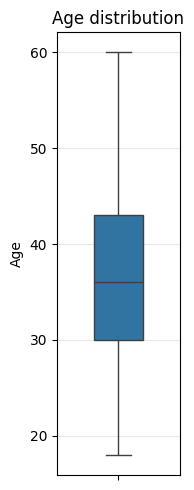

In [345]:
box_plot(df, 'Age')

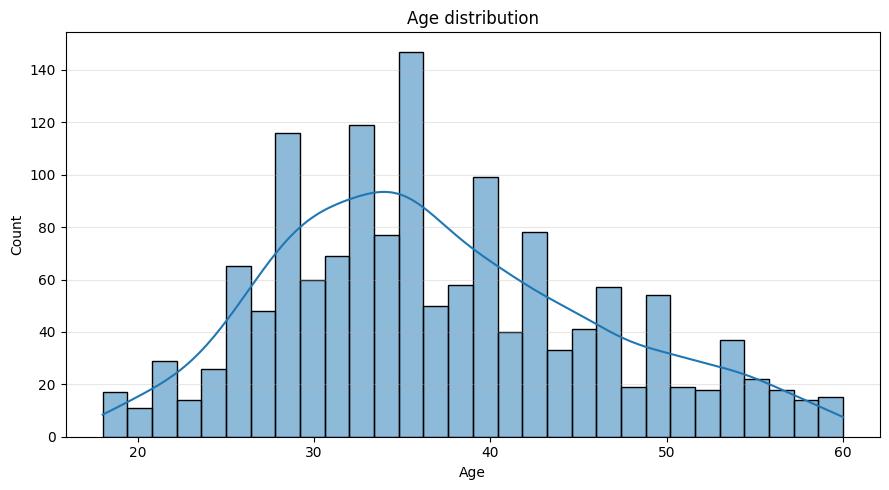

In [346]:
hist_plot(df, 'Age')

In [347]:
detect_skew_type(df, 'Age')

Mean   : 36.9238
Median : 36.0000
Mode   : 35.0000

Condition 'mean > median > mode' holds.
Positively skewed (right-skewed).


            mean  median
Attrition               
No         37.56    36.0
Yes        33.61    32.0 



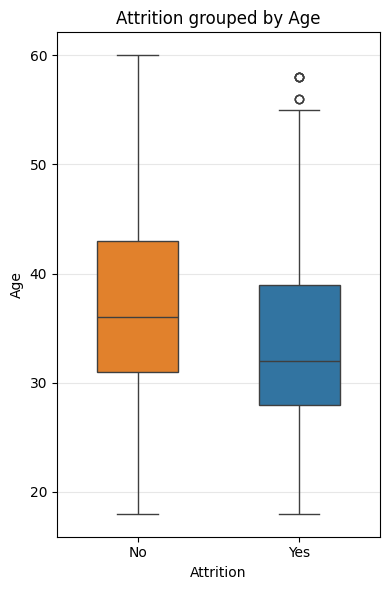

In [348]:
boxplot_by_target(df, 'Age')

**Feature Overview**
- The youngest employee is 18 and the oldest is 60, with an average age of 37 and a median of 36.
- The distribution is slightly right-skewed.
- Employees who left the company are younger on average (33.6) than those who stayed (37.6), indicating younger employees may have a higher attrition risk.

####**Gender**



In [349]:
info_feat(df, 'Gender')

Description:
count     1470
unique       2
top       Male
freq       882
Name: Gender, dtype: object


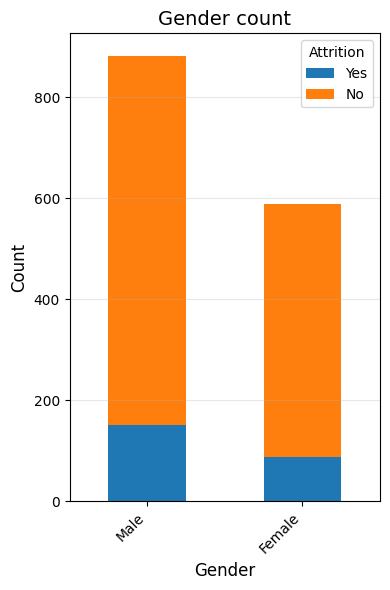

In [350]:
bar_plot_by_target(df, 'Gender')

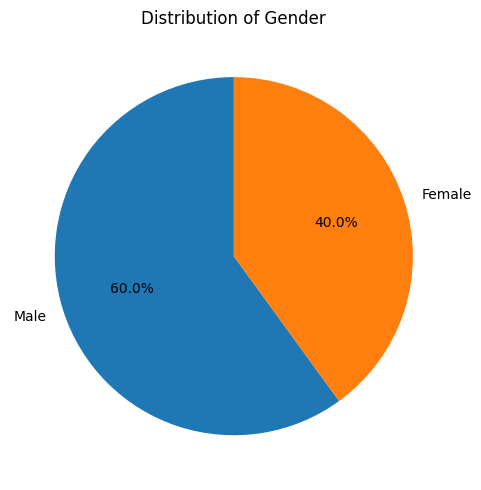

In [428]:
pie_plot(df, 'Gender')

**Feature Overview**
- The dataset has 60% male and 40% female employees. Males are slightly more represented in the organization.

####**Marital status**



In [352]:
info_feat(df, 'MaritalStatus')

Description:
count        1470
unique          3
top       Married
freq          673
Name: MaritalStatus, dtype: object


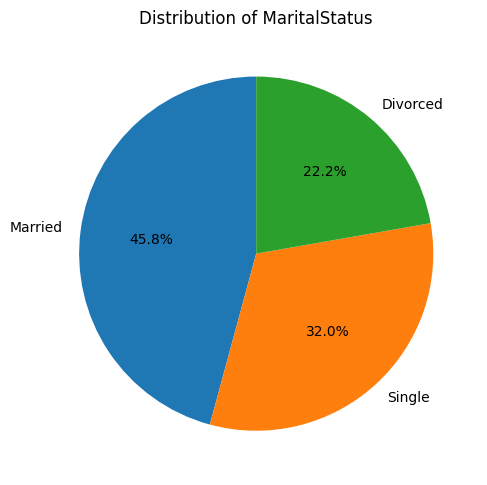

In [353]:
pie_plot(df, 'MaritalStatus')

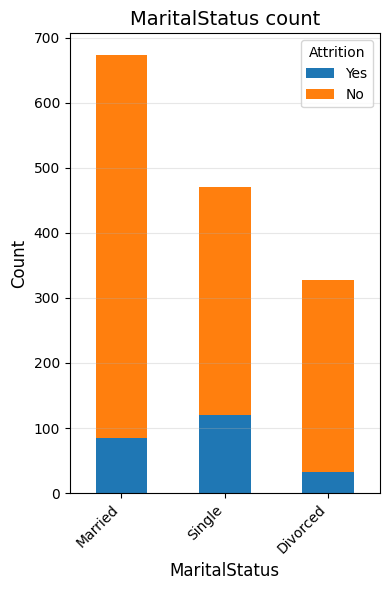

In [354]:
bar_plot_by_target(df, 'MaritalStatus')

**Feature Overview**
- Most employees are married (46%), followed by single (32%) and divorced (22%).
- Attrition is highest among single employees, while married employees show lower attrition.

##**2.2 Education Background Features**

####**Education**



In [355]:
info_feat(df, 'Education')

Description:
count    1470.000000
mean        2.912925
std         1.024165
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Education, dtype: float64


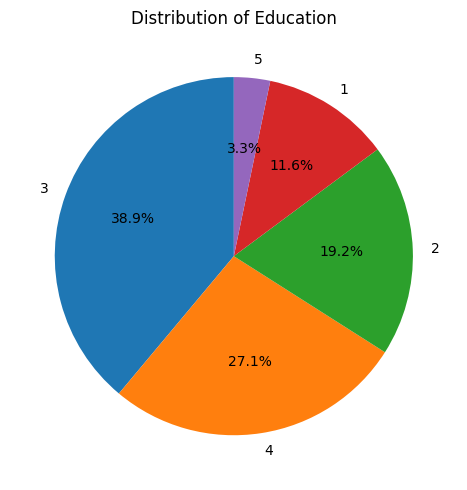

In [356]:
pie_plot(df, 'Education')

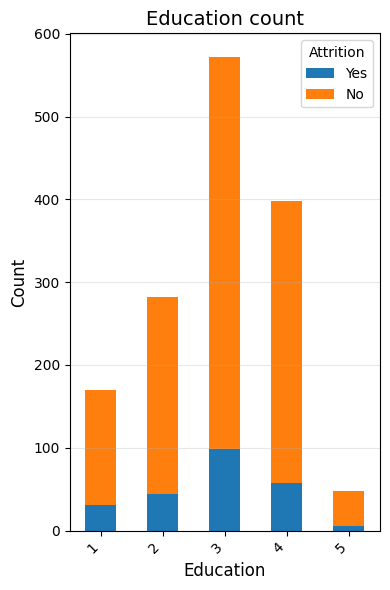

In [357]:
bar_plot_by_target(df, 'Education')

**Feature Overview**
- Level 3 (≈39%) and level 4 (≈27%) dominate, suggesting most employees have a bachelor or higher degree.

####**EducationField**



In [358]:
info_feat(df, 'EducationField')

Description:
count              1470
unique                6
top       Life Sciences
freq                606
Name: EducationField, dtype: object


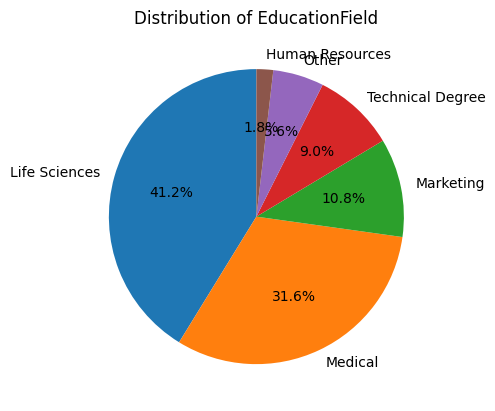

In [359]:
pie_plot(df, 'EducationField')

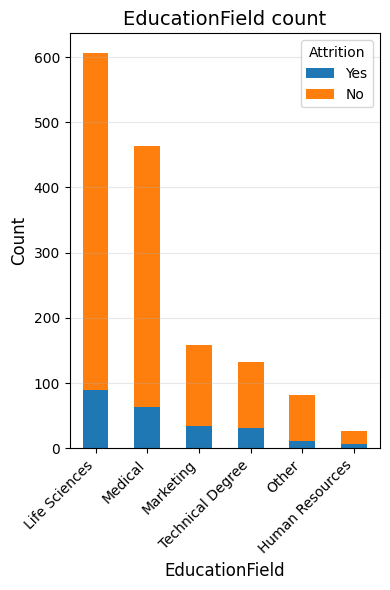

In [360]:
bar_plot_by_target(df, 'EducationField')

**Feature Overview**
- Most employees studied Life Sciences (41%) or Medical (32%), indicating a strong focus on health-related fields.
- Other fields include Marketing (11%), Technical Degree (9%), Other (6%), and Human Resources (2%).

##**2.3 Job Features**

####**Department**



In [361]:
info_feat(df, 'Department')

Description:
count                       1470
unique                         3
top       Research & Development
freq                         961
Name: Department, dtype: object


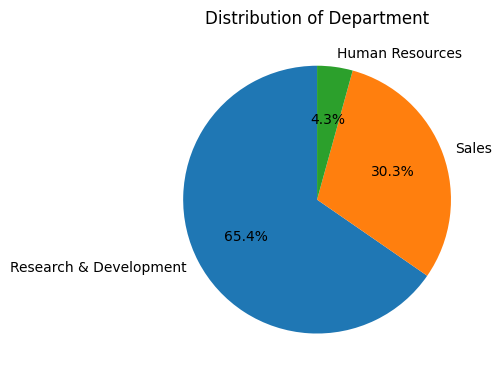

In [362]:
pie_plot(df, 'Department')

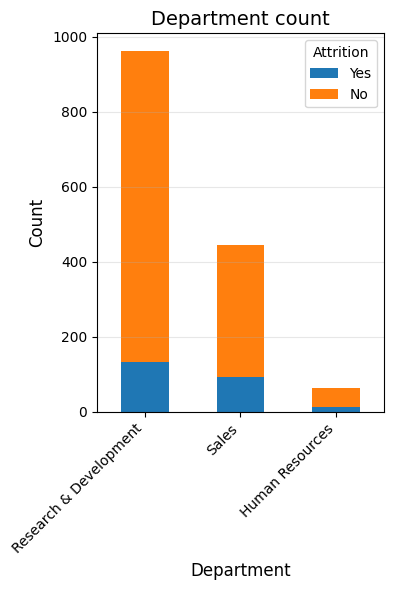

In [363]:
bar_plot_by_target(df, 'Department')

Let's see how **Job Roles** are distributed across **Departments** and how the company structure looks.

In [364]:
fig = px.sunburst(
    df,
    path=["Department", "JobRole"],
    title="Company Structure (department -> job role)",
    width=550,
    height=550
)

fig.show()

**Feature Overview**
- The company is mainly focused on R&D and Sales, with HR as a small support segment.
- R&D is dominated by technical roles, Sales by front-line executives, reflecting an organization oriented toward production, innovation and commercial operations.

####**Job Role**



In [365]:
info_feat(df, 'JobRole')

Description:
count                1470
unique                  9
top       Sales Executive
freq                  326
Name: JobRole, dtype: object


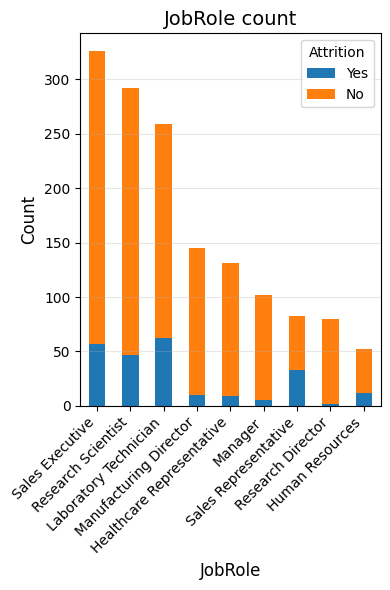

In [366]:
bar_plot_by_target(df, 'JobRole')

**Feature Overview**
- Sales Executive is the most common role.
- Laboratory Technicians have the highest number of leavers, but attrition is proportionally highest among Sales Representatives.

####**Business Travel**



In [367]:
info_feat(df, 'BusinessTravel')

Description:
count              1470
unique                3
top       Travel_Rarely
freq               1043
Name: BusinessTravel, dtype: object


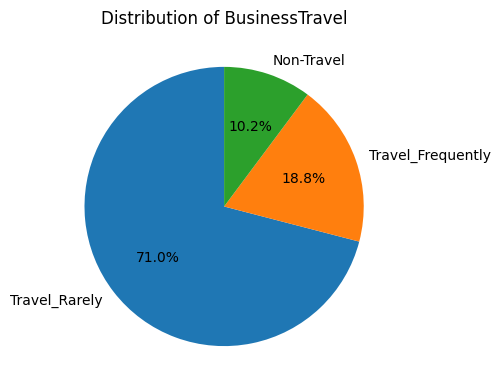

In [368]:
pie_plot(df, 'BusinessTravel')

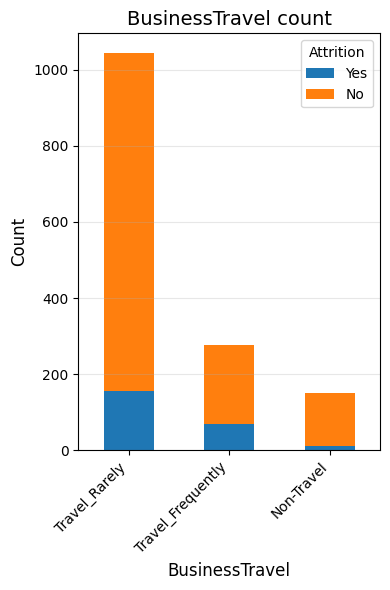

In [369]:
bar_plot_by_target(df, 'BusinessTravel')

**Feature Overview**
- Most employees travel rarely for business, while a smaller proportion travel frequently or not at all.

####**Over Time**

In [370]:
info_feat(df, 'OverTime')

Description:
count     1470
unique       2
top         No
freq      1054
Name: OverTime, dtype: object


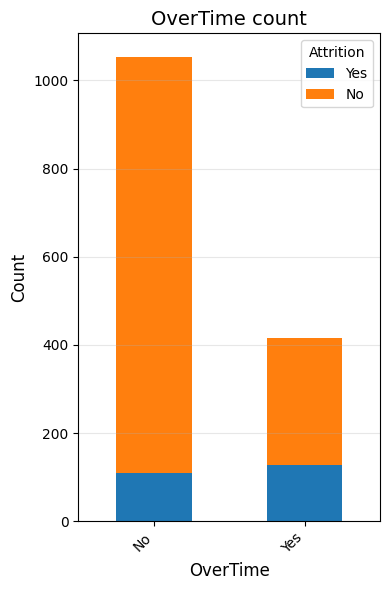

In [371]:
bar_plot_by_target(df, 'OverTime')

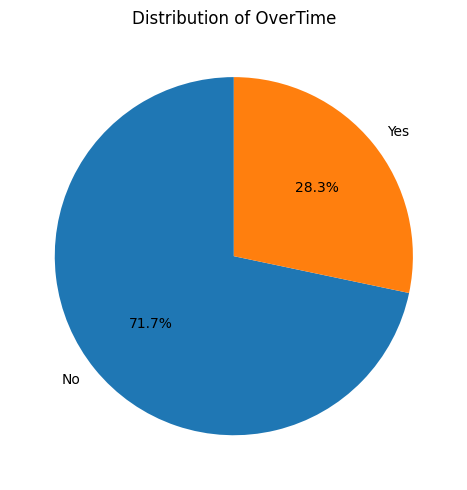

In [372]:
pie_plot(df, 'OverTime')

**Feature Overview**
- Most employees don't work overtime, but attrition is higher among those who do.

####**Distance From Home**

In [373]:
info_feat(df, 'DistanceFromHome')

Description:
count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64


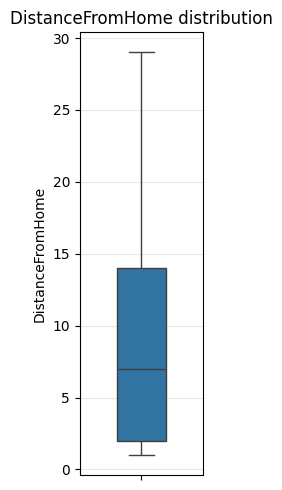

In [374]:
box_plot(df, 'DistanceFromHome')

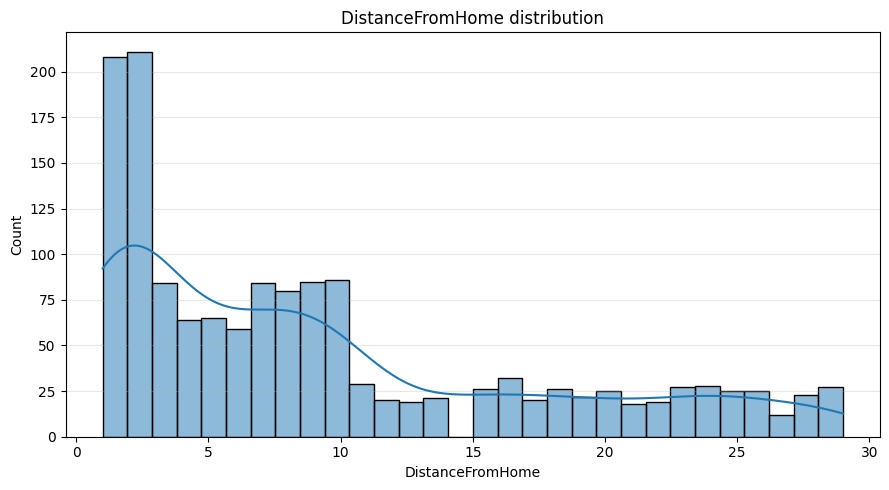

In [375]:
hist_plot(df, 'DistanceFromHome')

In [376]:
detect_skew_type(df, 'DistanceFromHome')

Mean   : 9.1925
Median : 7.0000
Mode   : 2.0000

Condition 'mean > median > mode' holds.
Positively skewed (right-skewed).


            mean  median
Attrition               
No          8.92     7.0
Yes        10.63     9.0 



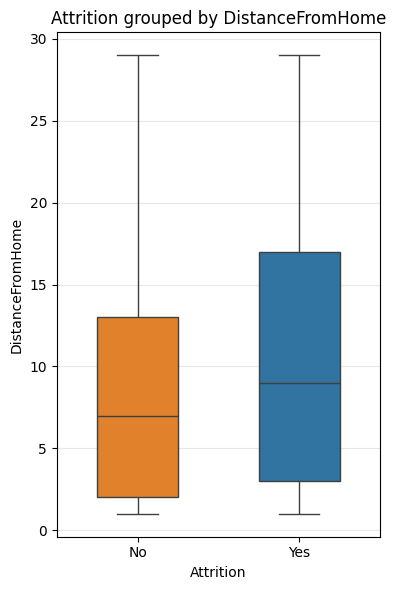

In [377]:
boxplot_by_target(df, 'DistanceFromHome')

**Feature Overview**
- The average employee lives about 9 units from work.
- Most employees live very close (mode = 2), but there are outliers up to 29 units, making the distribution positively skewed.
- Employees who left the company tend to live slightly farther away (10.6) compared to those who stayed (8.9).

##**2.4 Financial Features**

####**Monthly Income**



In [378]:
info_feat(df, 'MonthlyIncome')

Description:
count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


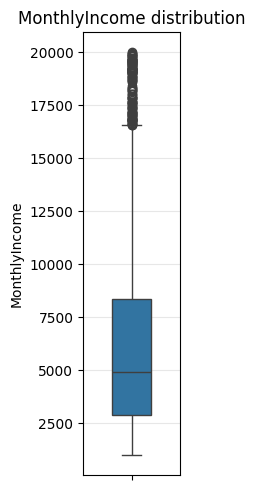

In [379]:
box_plot(df, 'MonthlyIncome')

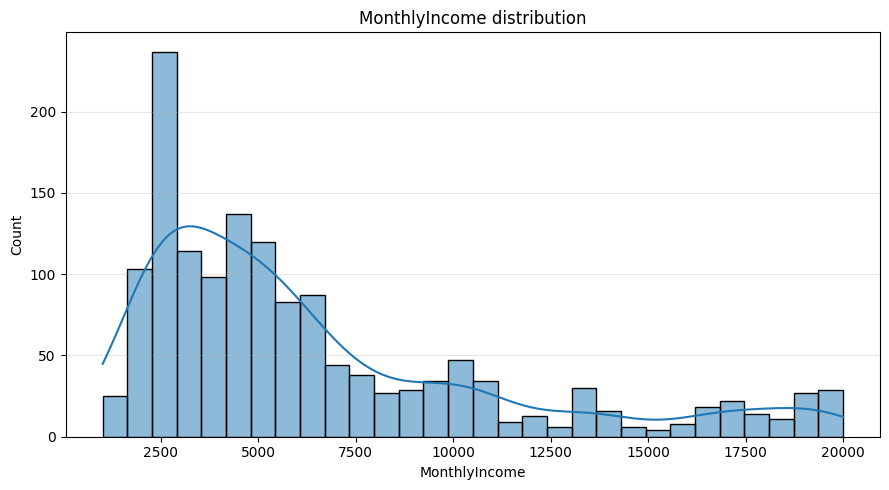

In [380]:
hist_plot(df, 'MonthlyIncome')

In [381]:
detect_skew_type(df, 'MonthlyIncome')

Mean   : 6502.9313
Median : 4919.0000
Mode   : 2342.0000

Condition 'mean > median > mode' holds.
Positively skewed (right-skewed).


              mean  median
Attrition                 
No         6832.74  5204.0
Yes        4787.09  3202.0 



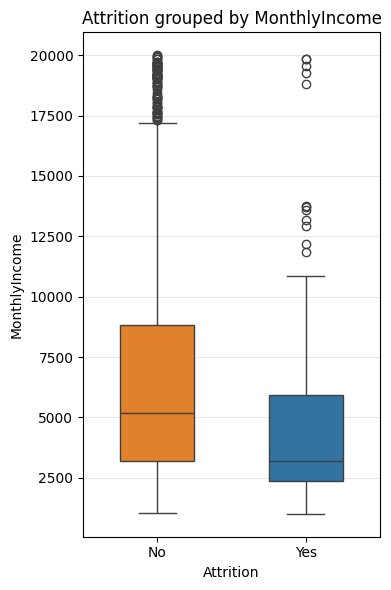

In [382]:
boxplot_by_target(df, 'MonthlyIncome')

**Feature Overview**
- The mean monthly income is 6 503, but but this value is influenced by high-income values. The median income is 4 919, showing that most employees earn well below the average.
- The distribution is positively skewed.
- Employees who left the company have a lower average income than those who stayed.

##**2.5 Career Features**

####**Num Companies Worked**



In [383]:
info_feat(df, 'NumCompaniesWorked')

Description:
count    1470.000000
mean        2.693197
std         2.498009
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: NumCompaniesWorked, dtype: float64


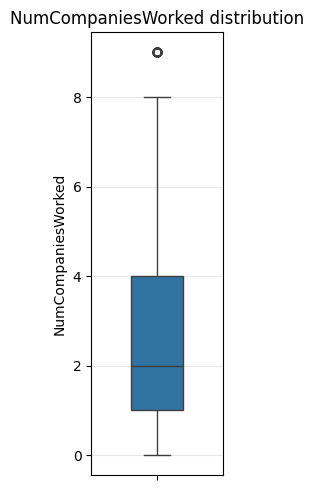

In [384]:
box_plot(df, 'NumCompaniesWorked')

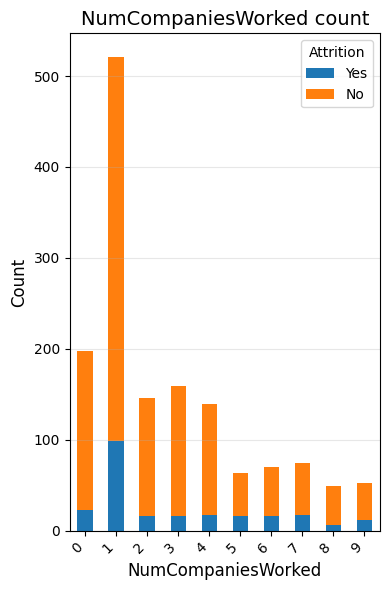

In [385]:
bar_plot_by_target(df, 'NumCompaniesWorked')

**Feature Overview**
- Most employees have worked at 1 company (35%) or 0-3 companies (≈70% cumulatively), showing relatively low job mobility.
- For 521 employees, this is their second job in life.

####**Total Working Years**

In [386]:
info_feat(df, 'TotalWorkingYears')

Description:
count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


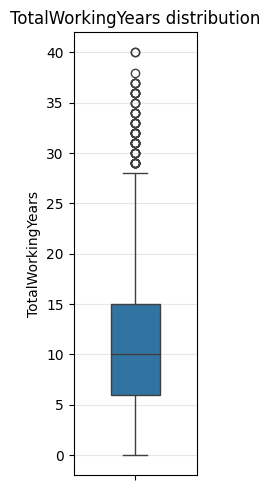

In [387]:
box_plot(df, 'TotalWorkingYears')

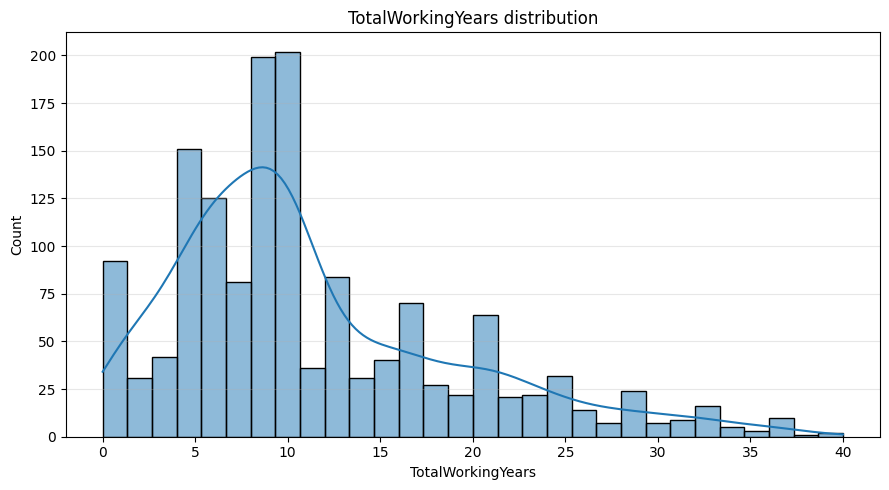

In [388]:
hist_plot(df, 'TotalWorkingYears')

            mean  median
Attrition               
No         11.86    10.0
Yes         8.24     7.0 



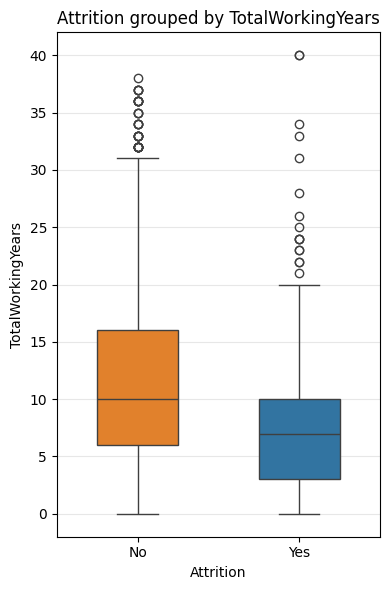

In [389]:
boxplot_by_target(df, 'TotalWorkingYears')

**Feature Overview**
- Most employees fall in the 6-15 years range, showing a concentration in mid-career experience.
- There are several outliers with very long careers (35+ years), indicating some highly experienced employees.
- Employees who left the company have shorter working experience (≈8 years) compared to those who stayed (≈12 years).

####**Years At Company**

In [390]:
info_feat(df, 'YearsAtCompany')

Description:
count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64


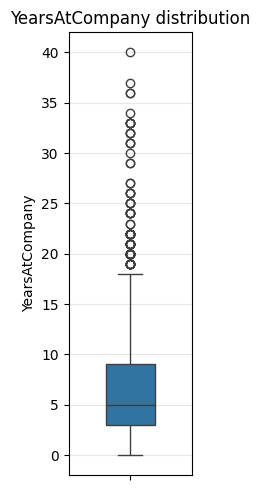

In [391]:
box_plot(df, 'YearsAtCompany')

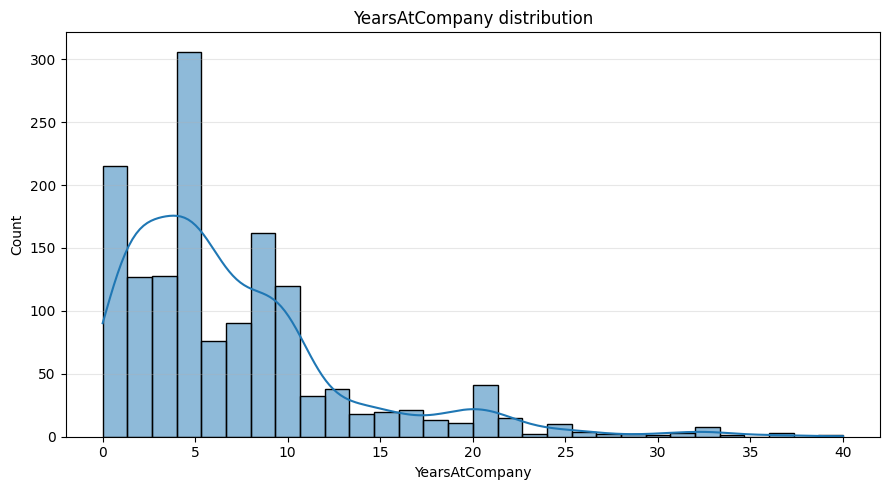

In [392]:
hist_plot(df, 'YearsAtCompany')

           mean  median
Attrition              
No         7.37     6.0
Yes        5.13     3.0 



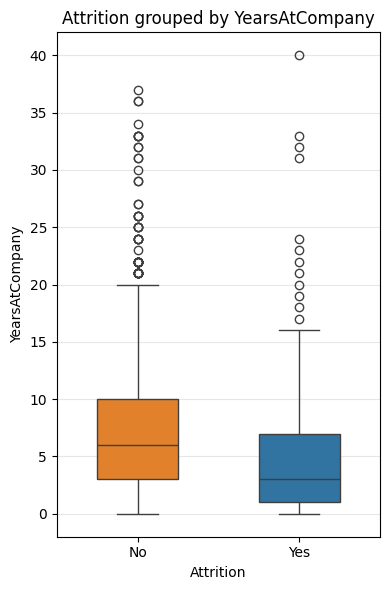

In [393]:
boxplot_by_target(df, 'YearsAtCompany')

**Feature Overview**
- There are several outliers with very long tenure - 20+ years.
- Employees who left the company tend to have shorter tenure compared to those who stayed.

##**2.6 Target Feauture (Attrition)**


In [394]:
info_feat(df, 'Attrition')

Description:
count     1470
unique       2
top         No
freq      1233
Name: Attrition, dtype: object


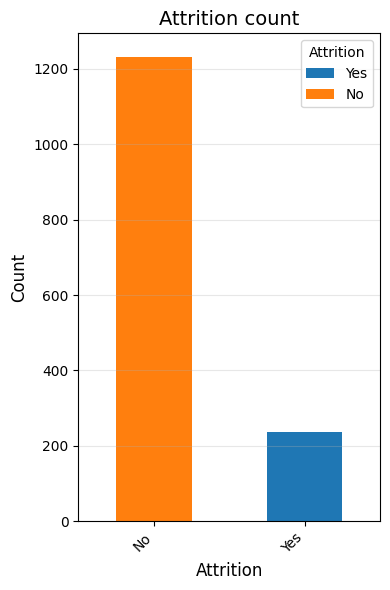

In [395]:
bar_plot_by_target(df, 'Attrition')

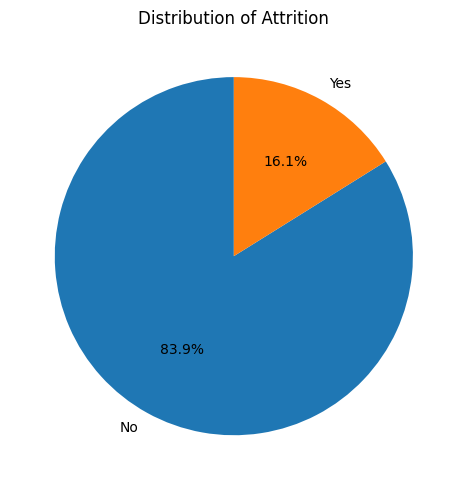

In [396]:
pie_plot(df, 'Attrition')

**Feature Overview**
- The target is imbalanced, with ≈16% of employees leaving and ≈84% staying.

#**3. Bivariate and Multivariate Analysis**

##**3.1 Employee Tenure and Attrition Analysis**

This section examines the relationship between employee tenure and attrition. **YearsAtCompany** is analyzed using cohort analysis and a survival curve to identify retention patterns and high-risk tenure groups.


###**3.1.1 Cohort Analysis**

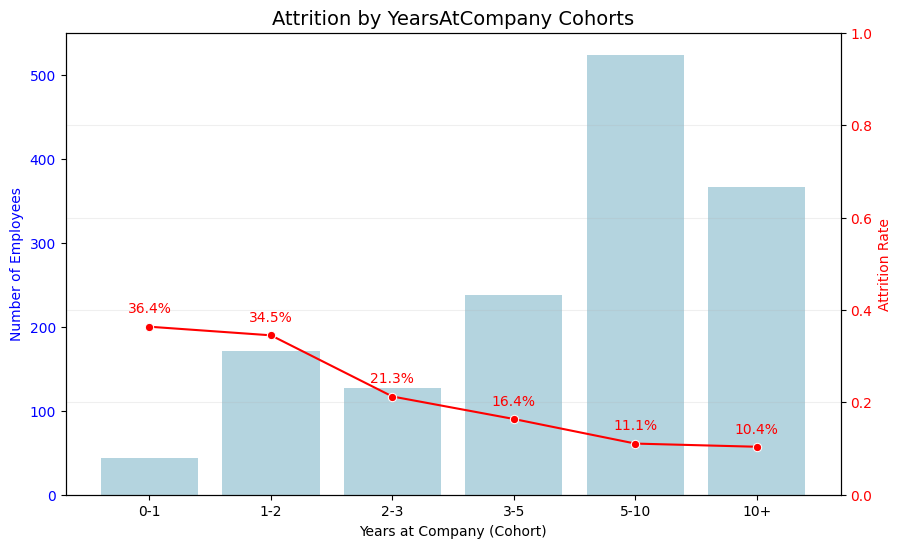

In [397]:
df_temp = df.copy()

bins = [0, 1, 2, 3, 5, 10, df_temp["YearsAtCompany"].max()+1]
labels = ["0-1","1-2","2-3","3-5","5-10","10+"]
df_temp["YearsCohort"] = pd.cut(df_temp["YearsAtCompany"], bins=bins, labels=labels, right=False)

cohort_summary = df_temp.groupby("YearsCohort", observed=True)["Attrition"].value_counts().unstack(fill_value=0)
cohort_summary["Total"] = cohort_summary.sum(axis=1)
cohort_summary["Attrition_Rate"] = cohort_summary["Yes"] / cohort_summary["Total"]

fig, ax1 = plt.subplots(figsize=(10,6))

sns.barplot(x=cohort_summary.index, y=cohort_summary["Total"], color="lightblue", ax=ax1)
ax1.set_ylabel("Number of Employees", color="blue")
ax1.set_xlabel("Years at Company (Cohort)")
ax1.tick_params(axis='y', labelcolor="blue")

ax2 = ax1.twinx()
sns.lineplot(x=cohort_summary.index, y=cohort_summary["Attrition_Rate"], marker="o", color="red", ax=ax2)
ax2.set_ylabel("Attrition Rate", color="red")
ax2.tick_params(axis='y', labelcolor="red")
ax2.set_ylim(0, 1)

for i, rate in enumerate(cohort_summary["Attrition_Rate"]):
    ax2.text(i, rate + 0.03, f"{rate:.1%}", color="red", ha='center')

plt.title("Attrition by YearsAtCompany Cohorts", fontsize=14)
plt.grid(alpha=0.2)
plt.show()

**Attrition Insights by Tenure Cohorts:**
- Attrition is highest among employees in the first two years (0-1 year: 36,4%; 1-2 years: 34,5%), indicating that the initial period is the most critical for retention.
- Attrition decreases steadily across cohorts.
- The 5-10 year cohort contains the most employees (~ 520) with low attrition (11.1%), suggesting mid-tenure staff are largely stable.
- Retention interventions should prioritize the first two years, focusing on onboarding, mentoring, and early-career engagement. Long-tenured employees are generally stable, so focus can shift to development and motivation programs.

###**3.1.2 Survival Curve**

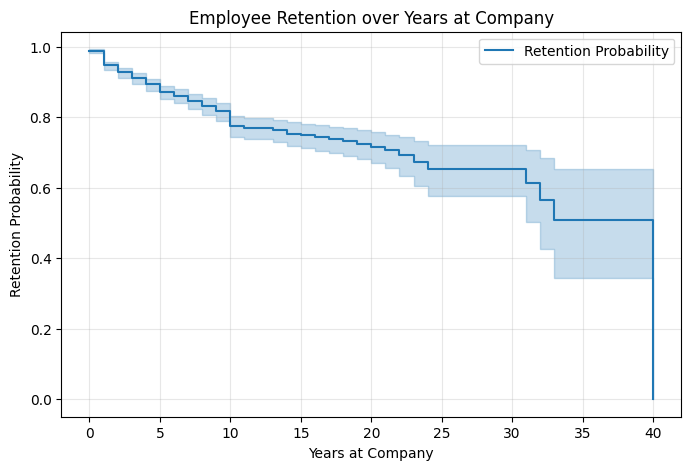

In [398]:
kmf = KaplanMeierFitter()
T = df["YearsAtCompany"]
E = df["Attrition"].map({"Yes": 1, "No": 0})

kmf.fit(T, event_observed=E, label="Retention Probability")
plt.figure(figsize=(8,5))
kmf.plot_survival_function(ci_show=True)

plt.title("Employee Retention over Years at Company")
plt.xlabel("Years at Company")
plt.ylabel("Retention Probability")
plt.grid(alpha=0.3)
plt.show()

**Survival Curve Insights:**
- Retention declines from 100% to ~78% within the first 10 years, indicating that roughly 1 / 5 of employees leave during this period.



##**3.2 Numerical vs Numerical Relationships**

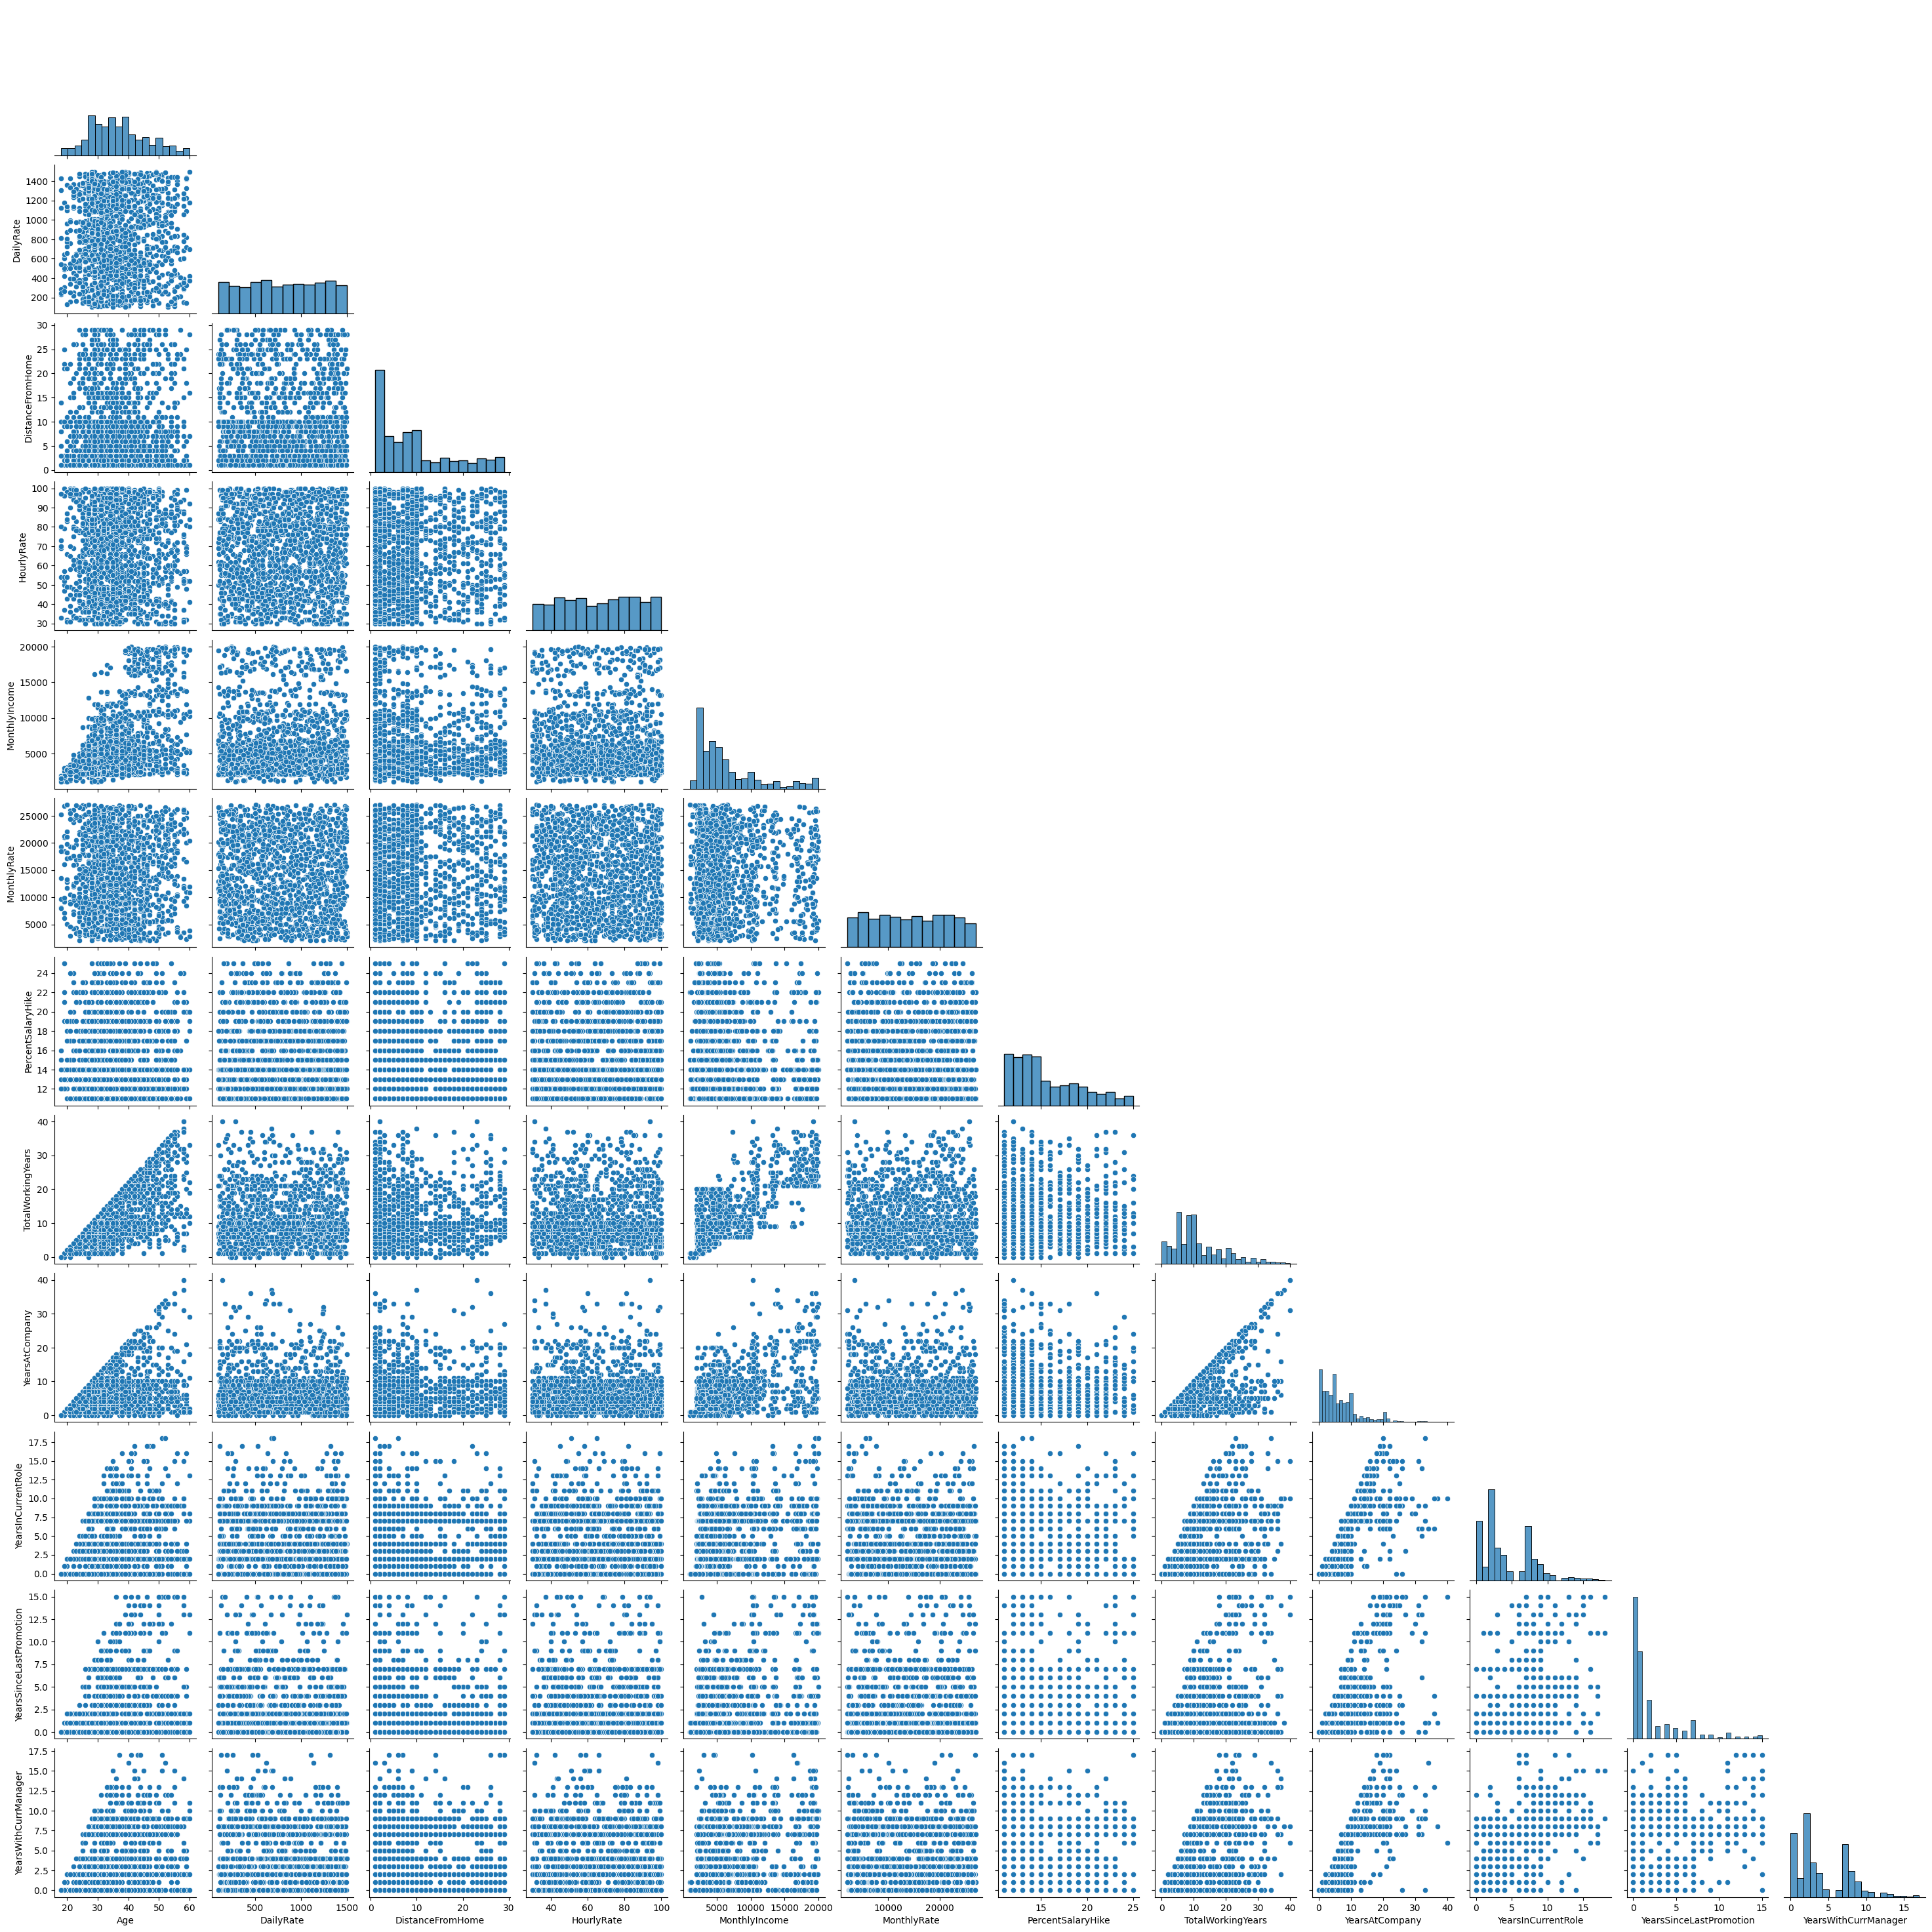

In [399]:
continuous_features = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
    'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
    'TotalWorkingYears', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

sns.pairplot(
    df[continuous_features],
    corner=True
)
plt.show()

**Key visual observations**
- The pairplot reveals a cluster of strongly related time-based features associated with employee age and career development.
  
  Variables such as:
    - Age
    - TotalWorkingYears
    - YearsAtCompany
    - YearsInCurrentRole
    - YearsSinceLastPromotion
    - YearsWithCurrManager
  
  show consistent positive relationships with one another.
- This suggests that many numerical features describe different aspects of the same underlying concept - **employee seniority and career progression**.
- MonthlyIncome feature also appear to increase with experience-related variables.

**Income-Experience Relationships**

To verify the observed visual patterns, additional regression plots are used to examine income versus key experience-related features.

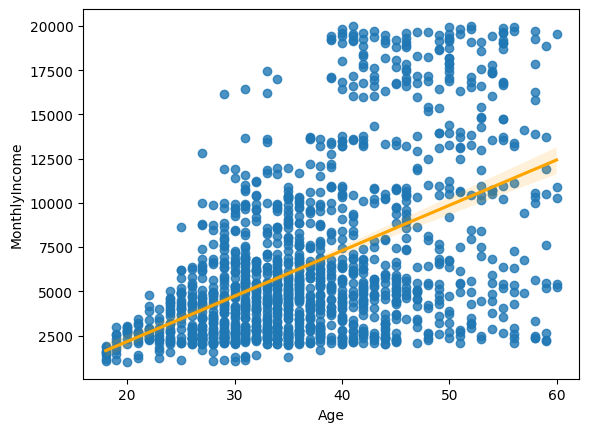

In [400]:
sns.regplot(x='Age',y='MonthlyIncome',data=df,line_kws={'color': 'orange'})
plt.show()

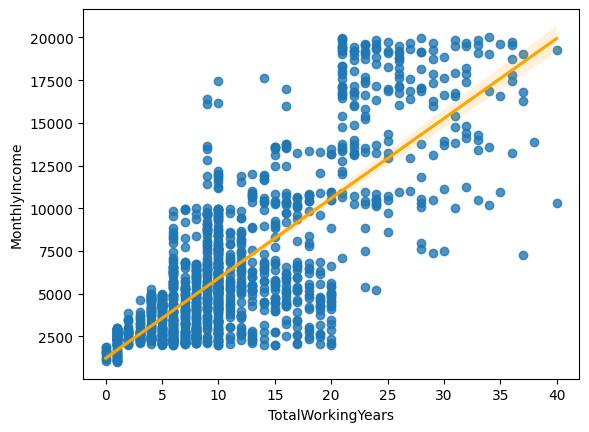

In [401]:
sns.regplot(x='TotalWorkingYears',y='MonthlyIncome',data=df,line_kws={'color': 'orange'})
plt.show()

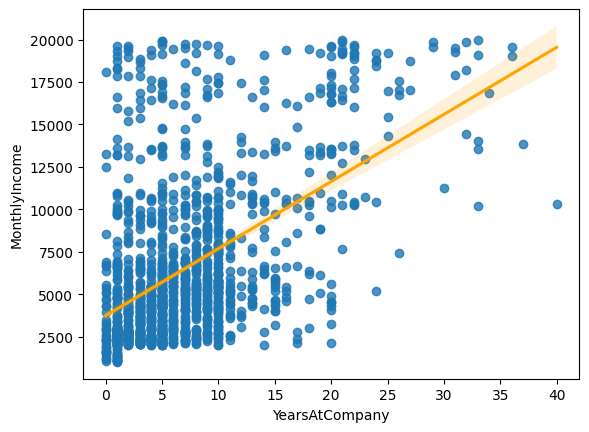

In [402]:
sns.regplot(x='YearsAtCompany', y='MonthlyIncome', data=df, line_kws={'color': 'orange'})
plt.show()

**Observations**
- All plots show a positive trend between experience-related variables (Age, TotalWorkingYears, YearsAtCompany) and MonthlyIncome.
- Income variability increases for employees with higher experience.

##**3.3 Correlation Heatmap**

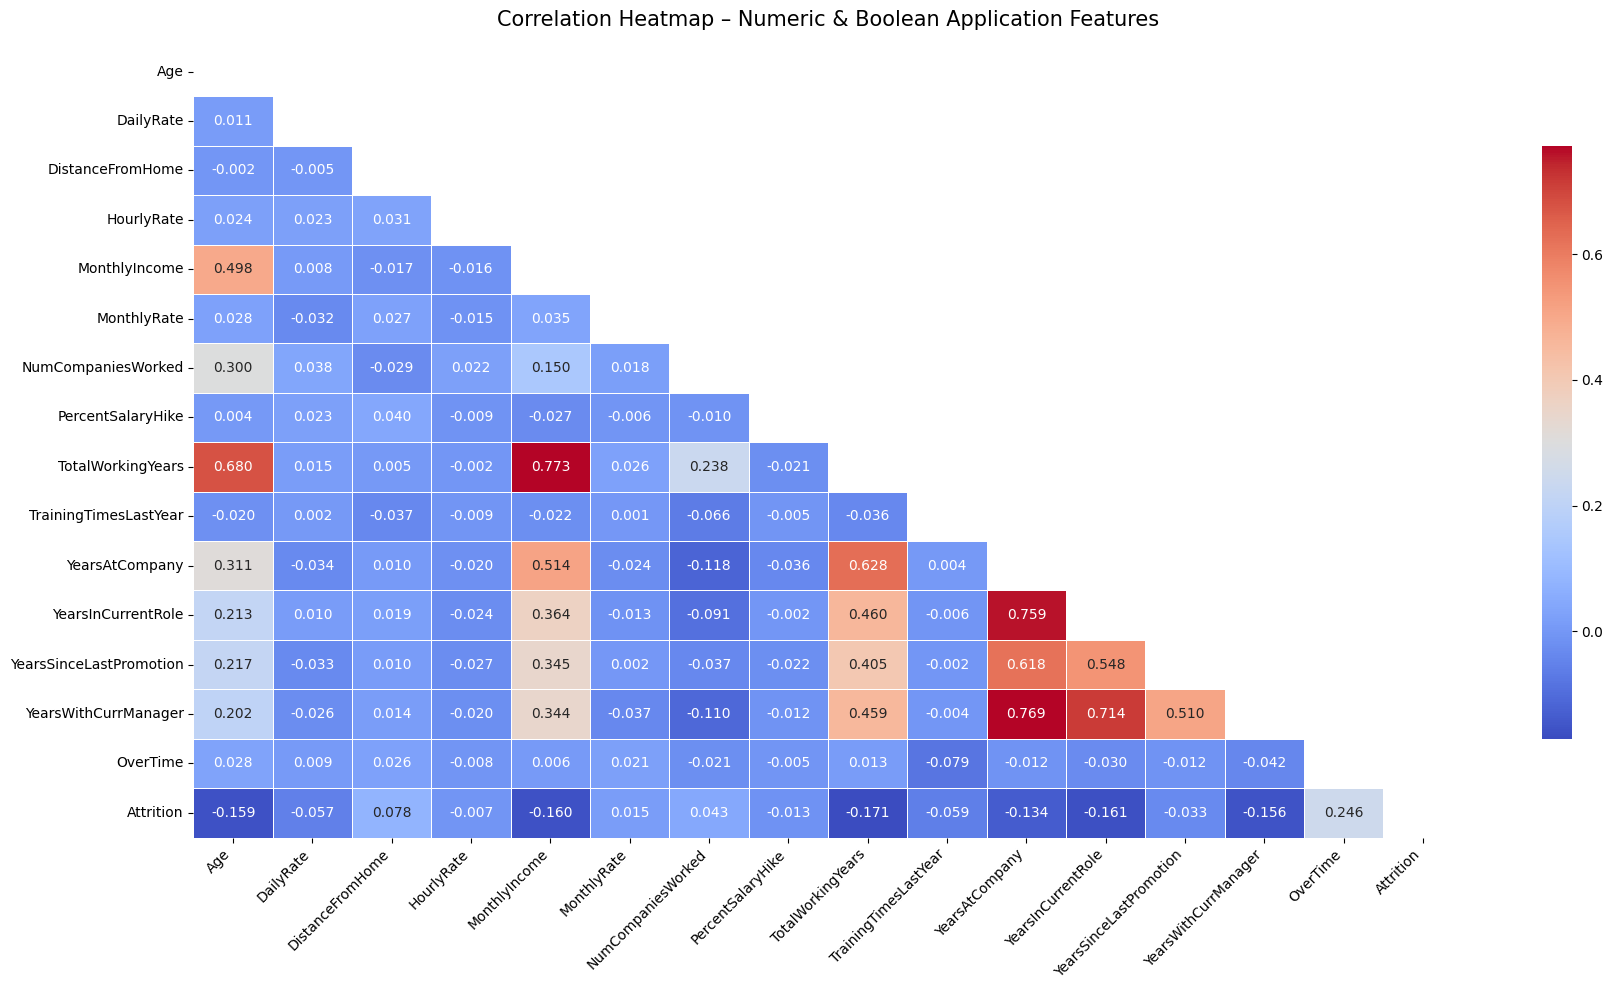

In [403]:
categorical_features = ['BusinessTravel','Department','Education',
                        'EducationField','EnvironmentSatisfaction', 'Gender',
                        'JobInvolvement','JobLevel','JobRole','JobSatisfaction',
                        'MaritalStatus','PerformanceRating',
                        'RelationshipSatisfaction','StockOptionLevel',
                        'WorkLifeBalance']
binary_features = ['OverTime', 'Attrition']
features_to_drop = ["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"]

df_copy = df.copy()

attrition_int = df_copy["Attrition"].map({"Yes": 1, "No": 0}).astype("int32")
overtime_int = df_copy["OverTime"].map({"Yes": 1, "No": 0}).astype("int32")

df_for_corr = df_copy.drop(categorical_features + binary_features + features_to_drop, axis=1)
corr_matrix = pd.concat([df_for_corr, overtime_int, attrition_int], axis=1).corr()

mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(18, 10))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".3f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 10}
)

plt.title("Correlation Heatmap – Numeric & Boolean Application Features", fontsize=15, pad=15)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Correlation Insights - Numeric & Boolean Features**
- As previously noted, strong correlations exist among Age, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager, showing that career tenure and age are closely linked.
- MonthlyIncome correlates most strongly with TotalWorkingYears (0.77), higher than with Age (0.5), confirming income grows with experience and seniority.
- Attrition negatively correlated with experience and age, indicating younger, less experienced employees are more likely to leave.
- OverTime has a moderate positive correlation with Attrition (0.25).
- DailyRate, HourlyRate, MonthlyRate, PercentSalaryHike and TrainingTimesLastYear show weak correlations both among themselves and with other variables, including Attrition, indicating limited influence of these factors on employee retention.

##**3.4 Chi-Square Statistical Tests**

Null hypothesis: The feature has no significant association with the target variable.

Alternate Hypothesis: The feature has a significant association with the target variable.

In [404]:
def chi_square_independence(df, feature, target='Attrition', alpha=0.05):
    table = pd.crosstab(df[feature], df[target])

    chi2, p, dof, expected = stats.chi2_contingency(table)
    crit = stats.chi2.ppf(q=1-alpha, df=dof)

    print(f"   Feature: {feature}")
    print(f"Chi-square statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"Critical value (alpha={alpha}): {crit:.3f}")
    print(f"p-value: {p:.8f}")

    if chi2 >= crit:
        print("(+) Reject H0: feature is associated with target.\n\n")
    else:
        print("(-) Fail to reject H0: no evidence of association.\n\n")

In [405]:
all_cat_features = list(categorical_features) + list(binary_features)

for feauture in all_cat_features:
  if feauture != "Attrition":
    chi_square_independence(df, feauture)

   Feature: BusinessTravel
Chi-square statistic: 24.182
Degrees of freedom: 2
Critical value (alpha=0.05): 5.991
p-value: 0.00000561
(+) Reject H0: feature is associated with target.


   Feature: Department
Chi-square statistic: 10.796
Degrees of freedom: 2
Critical value (alpha=0.05): 5.991
p-value: 0.00452561
(+) Reject H0: feature is associated with target.


   Feature: Education
Chi-square statistic: 3.074
Degrees of freedom: 4
Critical value (alpha=0.05): 9.488
p-value: 0.54552534
(-) Fail to reject H0: no evidence of association.


   Feature: EducationField
Chi-square statistic: 16.025
Degrees of freedom: 5
Critical value (alpha=0.05): 11.070
p-value: 0.00677398
(+) Reject H0: feature is associated with target.


   Feature: EnvironmentSatisfaction
Chi-square statistic: 22.504
Degrees of freedom: 3
Critical value (alpha=0.05): 7.815
p-value: 0.00005123
(+) Reject H0: feature is associated with target.


   Feature: Gender
Chi-square statistic: 1.117
Degrees of freedom: 1
Criti

**Chi-square test for categorical features vs Attrition (α = 0.05):**
- *Dependent features (**Reject H0**)*: BusinessTravel, Department, EducationField, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, OverTime, StockOptionLevel, WorkLifeBalance.
- *Independent features (**H0 holds true**)*: Education, Gender, PerformanceRating, RelationshipSatisfaction.

##**3.5 Numerical vs Categorical Relationships**

###**3.5.1 Age vs Categorical Features**

In [406]:
def plot_cat_boxplots(df, features, y_feature, n_cols=3, palette="pastel", special_rotation_feature="JobRole"):
    n_features = len(features)
    n_rows = math.ceil(n_features / n_cols)

    fig_w = 4.8 * n_cols
    fig_h = 4.6 * n_rows

    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        figsize=(fig_w, fig_h),
        dpi=160,
        constrained_layout=True
    )

    axes = axes.flatten() if hasattr(axes, "flatten") else [axes]

    for i, feature in enumerate(features):
        ax = axes[i]

        sns.boxplot(
            data=df,
            x=feature,
            y=y_feature,
            hue=feature,
            ax=ax,
            palette=palette,
            legend=False
        )
        ax.set_title(f"{feature} vs {y_feature}", fontsize=12, pad=8)
        ax.set(xlabel="", ylabel="")

        ax.tick_params(axis="x", labelrotation=45)
        if feature == special_rotation_feature:
            ax.tick_params(axis="x", labelrotation=80)
            ax.grid(axis="x", alpha=0.5)

        ax.tick_params(axis="y", labelsize=9)
        ax.grid(axis="y", alpha=0.25)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.show()

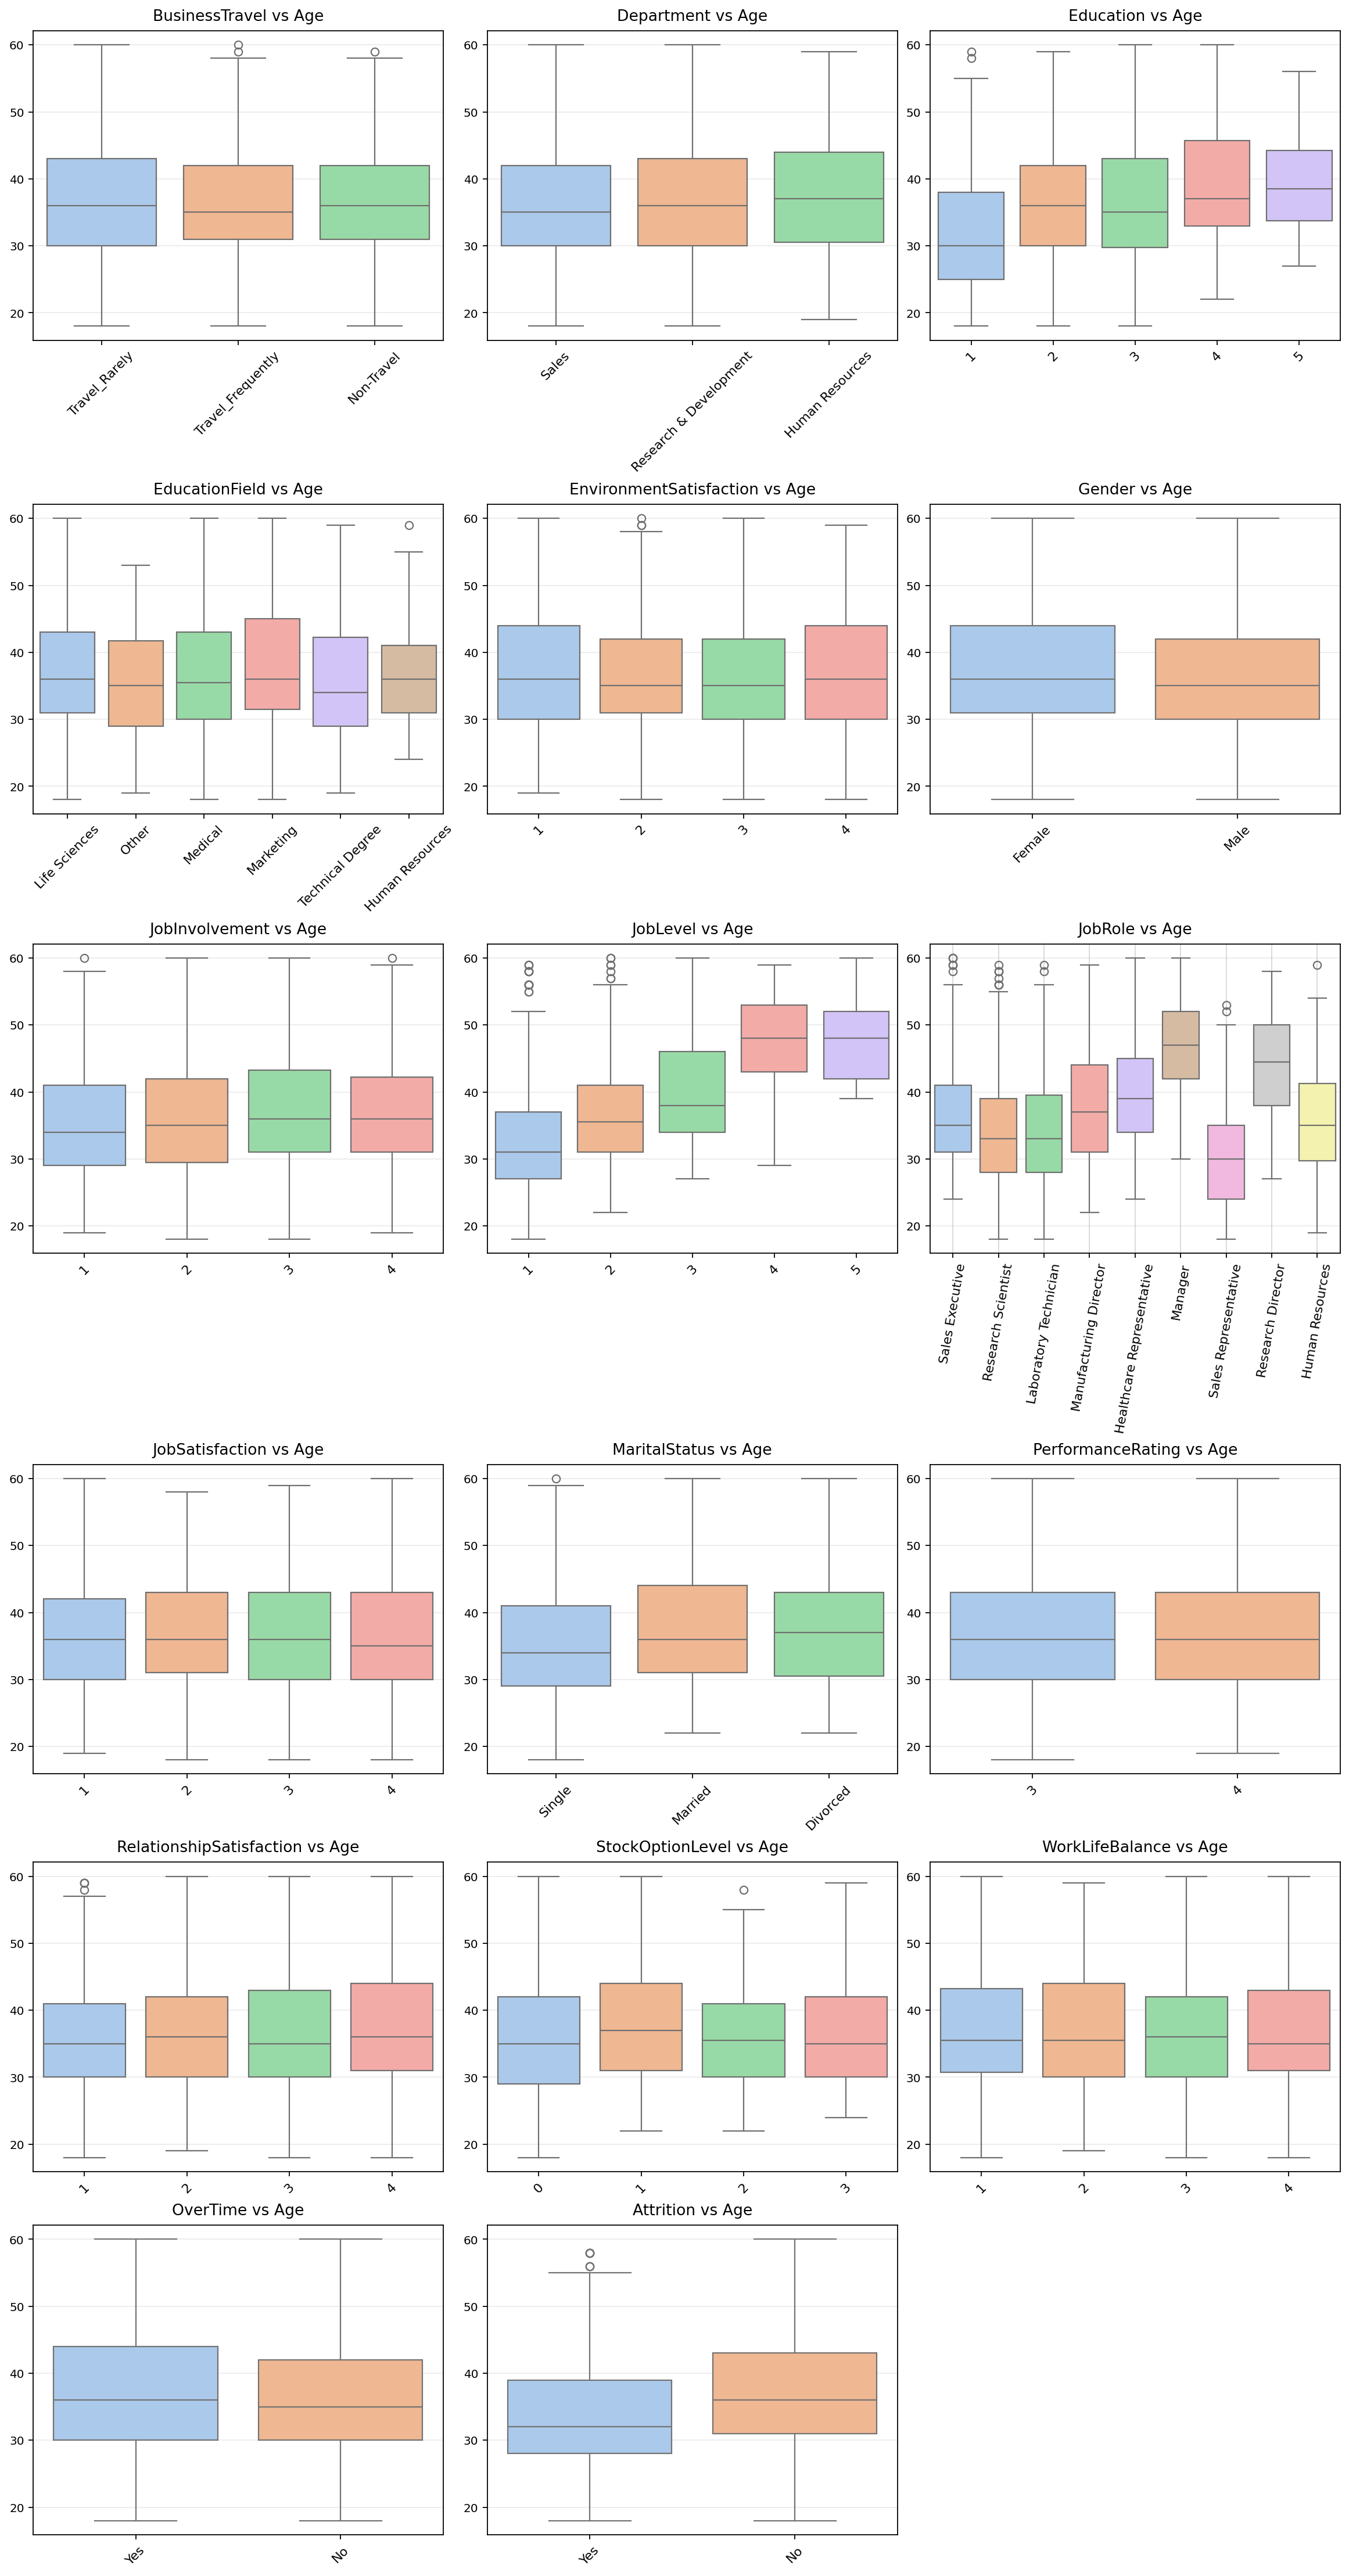

In [407]:
plot_cat_boxplots(df=df, features=all_cat_features, y_feature="Age")

**Age Insights**
- The youngest employees are Sales Representatives (median 30 years), while the oldest are Managers and Research Directors. There are no employees younger than 27 in these roles.
- Female employees are on average slightly older than male employees.
- The higher the JobLevel, the older the employee. A similar trend is observed with Education - higher education levels generally correspond to older employees.

###**3.5.2 Income vs Categorical Features**

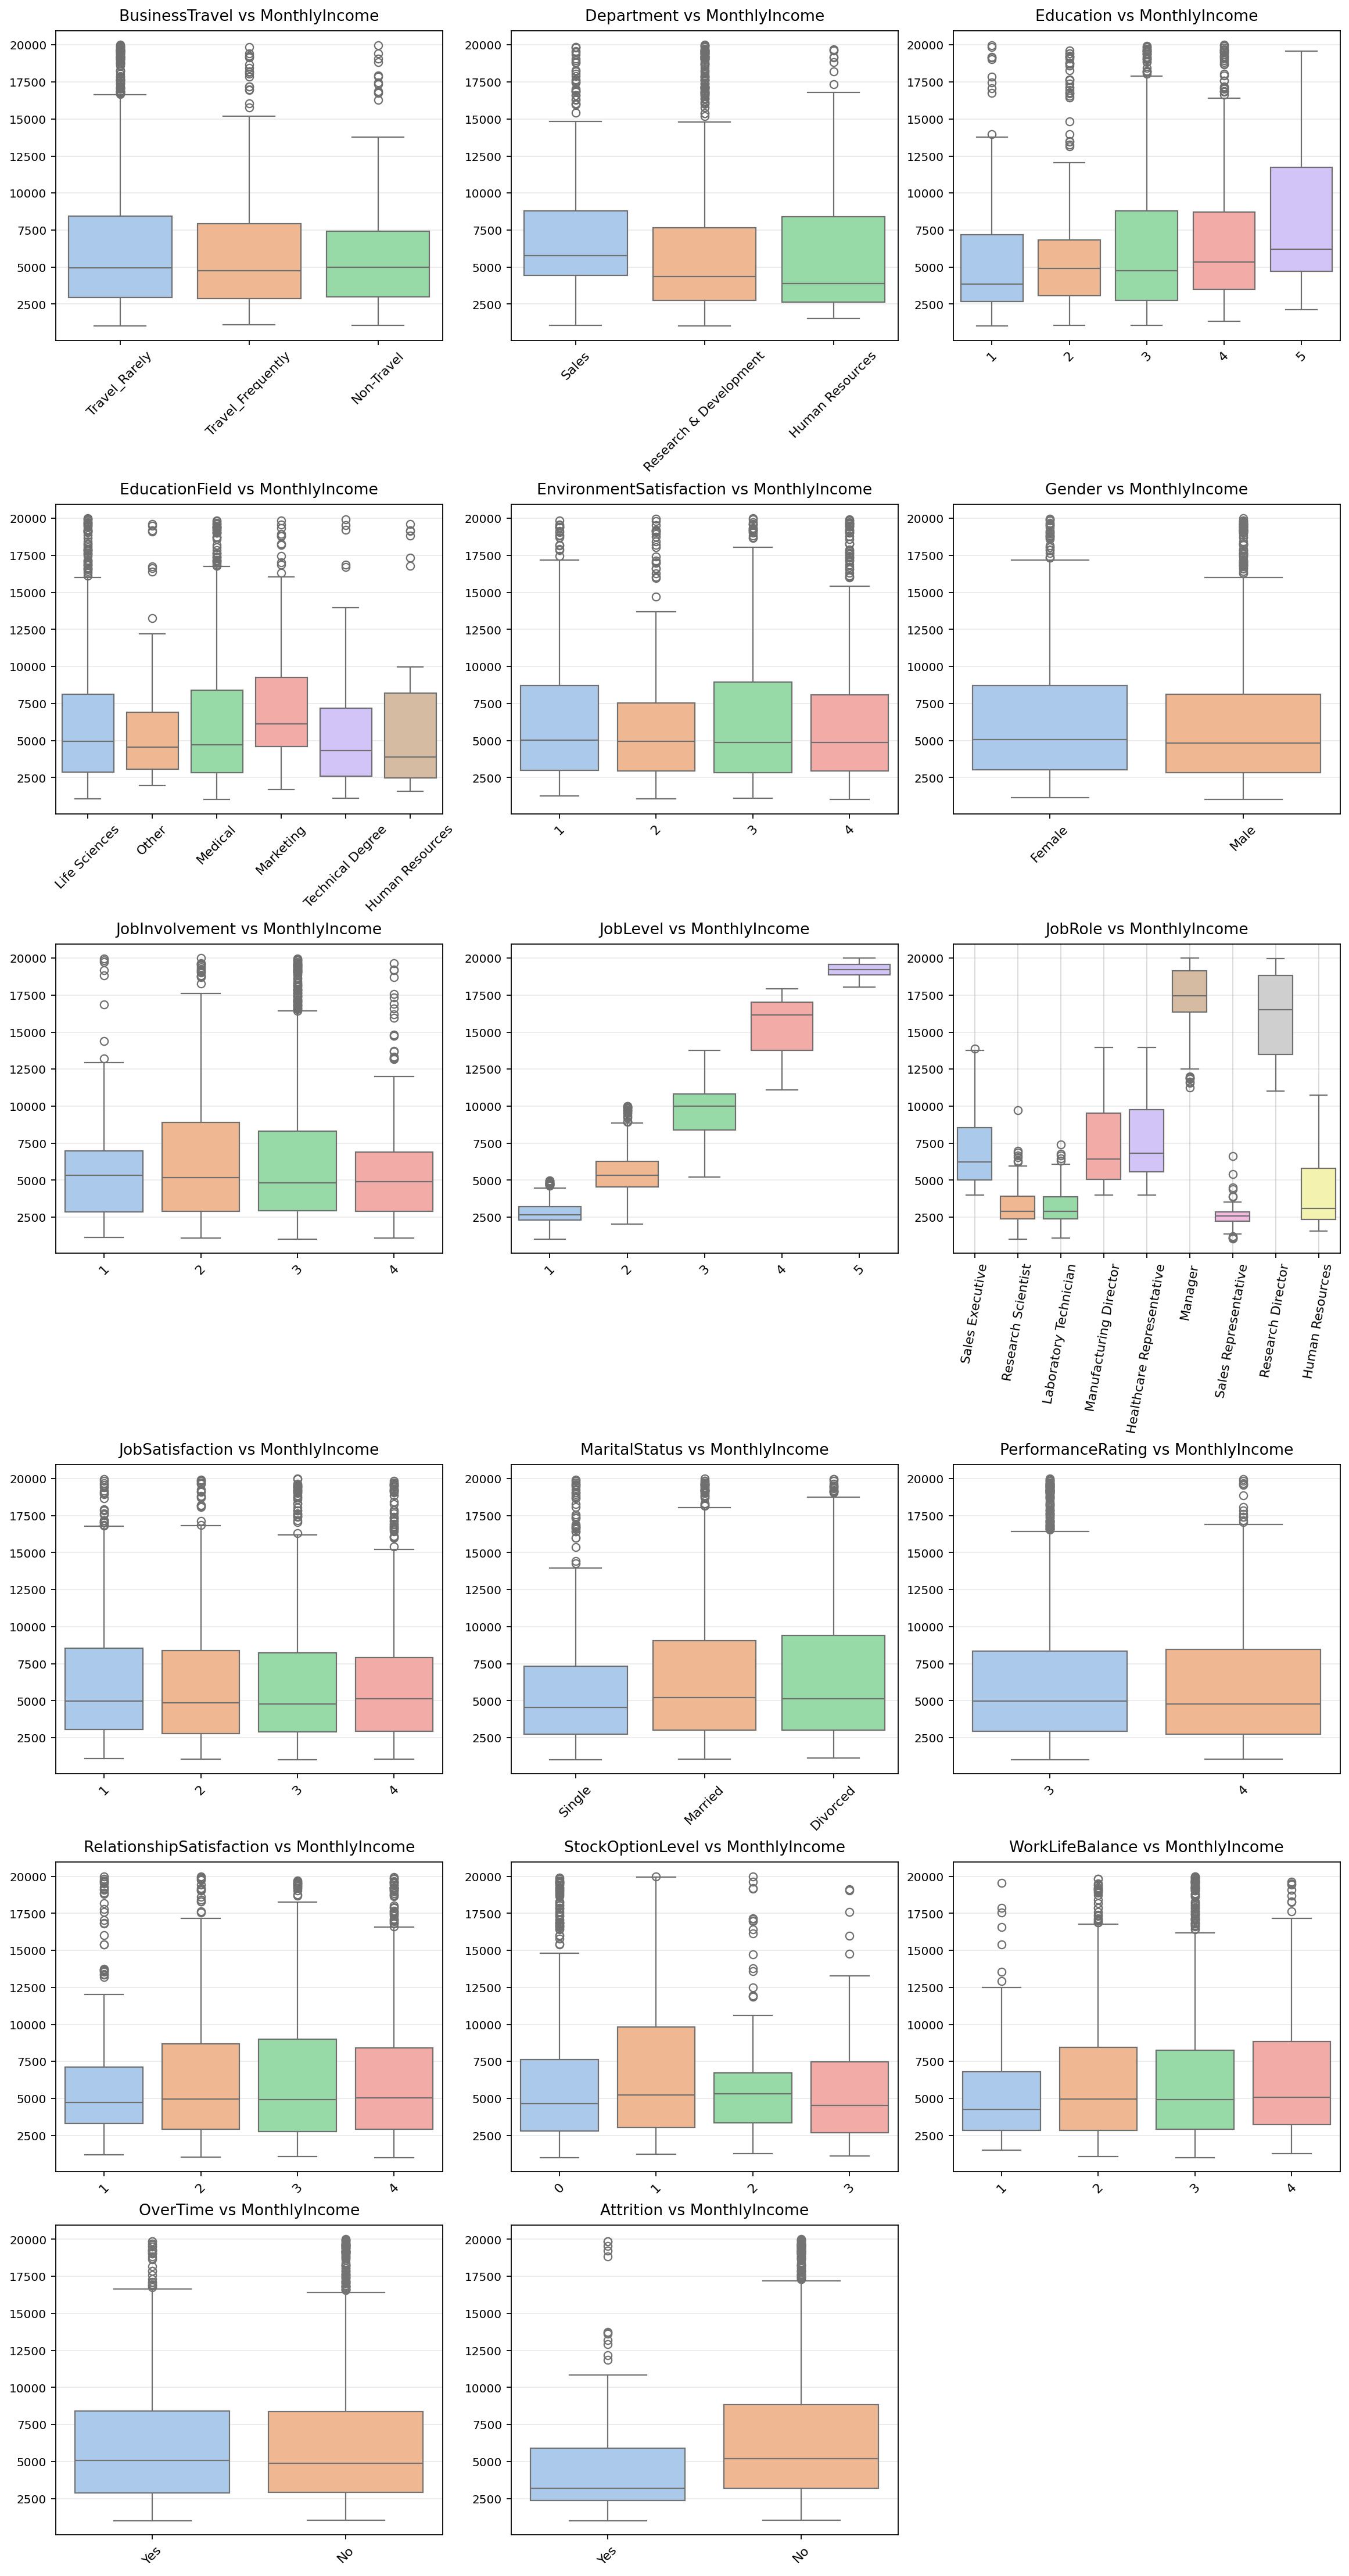

In [408]:
plot_cat_boxplots(df=df, features=all_cat_features, y_feature="MonthlyIncome")

**Income Insights**
- There is a clear positive relationship between JobLevel (1-5) and monthly income - the higher the JobLevel, the higher the income.
- Employees in «Manager» and «Research Director» roles earn the highest incomes. Research Scientists, Laboratory Technicians and Sales Representatives earn the lowest.
- In general, higher level of education correspond to higher income - so yes, studying does pay off 😉.
- The highest average income is seen in employees with Marketing degrees.
- Across all income levels, the median and average JobSatisfaction are roughly the same. Interestingly, some employees earning over 17 500 still have the lowest job satisfaction - money isn’t everything!
- Surprisingly, working overtime doesn’t seem to significantly increase income - hard work doesn’t always pay extra here.

#**4. Business-Oriented EDA Findings**

- Typical profile of an employee is: a male in his mid-30s, married, working in the «Research & Development» department. He has been with the company for 5 years, earning close to 5000 per month. He rarely travels for business and does not work overtime.
- The primary risk window is the first two years of employment. Employees who pass this stage demonstrate higher retention stability, highlighting the importance of structured onboarding and early-career support.
- Overtime is a measurable burnout-related risk factor, as increased workload is not matched by proportionally higher pay and is associated with higher attrition.
- The salary structure is well aligned with seniority, while attrition is concentrated primarily among junior and early-career employees rather than senior staff.
- Attrition patterns are structural rather than random, influenced primarily by underlying organizational and work-related factors.

#**5. Data Preparation**

##**5.1 Feature Selection**

###**Drop features**

In [409]:
def drop_features(df: pd.DataFrame, columns_to_drop: list):
    return df.drop(columns=columns_to_drop, errors="ignore")

***Dropped features and reasons***

- «EmployeeCount» - constant value (always 1), no predictive value
- «EmployeeNumber» - technical ID, not useful for modeling.
- «Over18» - constant value ("Y") for all records.
- «StandardHours» - constant value (80), no information for prediction.
- «DailyRate», «HourlyRate», «MonthlyRate» - removed due to unclear interpretation and limited predictive value; «MonthlyIncome» sufficiently captures employee compensation for modeling purposes.
- «PerformanceRating» - dropped because Chi-Square test shows no significant association with the target (p-value = 0.99), providing no predictive value.
- «YearsInCurrentRole», «YearsSinceLastPromotion», «YearsWithCurrManager» - removed due to high correlation with other time-related features (multicollinearity).

Kept: «Age», «TotalWorkingYears», «YearsAtCompany» - enough to represent age and tenure without redundancy.

##**5.2 Data Transformation Pipeline**

###**Binary Encoding**

Conversion of binary categorical features into 0/1 format.

In [410]:
def binary_binning(df, columns):
    df = df.copy()
    mapping = {
        "yes": 1, "y": 1,
        "no": 0, "n": 0
    }
    for c in columns:
        df[c] = df[c].astype(str).str.lower().map(mapping)
    return df

###**One-hot encoding**

Transformation of categorical variables into dummy variables.

In [411]:
def one_hot_encode(df: pd.DataFrame, columns: list, drop_first: bool = False):
    df = df.copy()
    df = pd.get_dummies(df, columns=columns, drop_first=False)

    bool_cols = df.select_dtypes(include='bool').columns
    df[bool_cols] = df[bool_cols].astype(int)
    return df

###**Feature Scaling**

Min-Max normalization for numeric stability.

In [412]:
def min_max_scale(df: pd.DataFrame, columns: list):
    df = df.copy()

    for col in columns:
        min_val = df[col].min()
        max_val = df[col].max()

        if max_val - min_val == 0:
            df[col] = 0
        else:
            df[col] = (df[col] - min_val) / (max_val - min_val)

    return df

##**5.3 Final Dataset Construction**

Pipeline-based preprocessing using `.pipe()` chaining for reproducibility.

In [413]:
drop_cols = [
    "EmployeeCount", "EmployeeNumber",
    "Over18", "StandardHours",
    "HourlyRate", "DailyRate", "MonthlyRate",
    "PerformanceRating",
    "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager",
]

binary_cols = ["OverTime", "Attrition"]

categorical_cols = [
    "BusinessTravel", "Department", "EducationField",
    "Gender", "JobRole", "MaritalStatus"
]

scale_cols = ["Age", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany"]

df_processed = (
    df
    .pipe(drop_features, drop_cols)
    .pipe(binary_binning, binary_cols)
    .pipe(one_hot_encode, categorical_cols, drop_first=True)
    .pipe(min_max_scale, scale_cols)
)

In [414]:
with pd.option_context('display.max_columns', None, 'display.width', None):
    display(df_processed.head())

Age  Attrition  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.547619          1                 1          2                        2   
1  0.738095          0                 8          1                        3   
2  0.452381          1                 2          2                        4   
3  0.357143          0                 3          4                        4   
4  0.214286          0                 2          1                        1   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0               3         2                4       0.262454   
1               2         2                2       0.217009   
2               2         1                3       0.056925   
3               3         1                3       0.100053   
4               3         1                2       0.129489   

   NumCompaniesWorked  OverTime  PercentSalaryHike  RelationshipSatisfaction  \
0                   8         1                 11                         1   
1                   1         0                 23                         4   
2                   6         1                 15                         2   
3                   1         1                 11                         3   
4                   9         0                 12                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0              0.200                      0   
1                 1              0.250                      3   
2                 0              0.175                      3   
3                 0              0.200                      3   
4                 1              0.150                      3   

   WorkLifeBalance  YearsAtCompany  BusinessTravel_Non-Travel  \
0                1            0.15                          0   
1                3            0.25                          0   
2                3            0.00                          0   
3                3            0.20                          0   
4                3            0.05                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   
3                                 1                             0   
4                                 0                             1   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  0   
1                           0                                  1   
2                           0                                  1   
3                           0                                  1   
4                           0                                  1   

   Department_Sales  EducationField_Human Resources  \
0                 1                               0   
1                 0                               0   
2                 0                               0   
3                 0                               0   
4                 0                               0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   
3                             1                         0   
4                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   
2                       0                     1   
3                       0                     0   
4                       1                     0   

   EducationField_Technical Degree  Gender_Female  Gende

#**6. Prediction / Modeling**

## **6.1 Train-Test Split and Data Balancing**

The dataset is split into **70% training and 30% test** sets.

To address class imbalance, **SMOTE** is applied **only to the training set** to balance class distribution, while the test set remains untouched to ensure realistic evaluation.

In [415]:
X = df_processed.drop('Attrition', axis=1)
y = df_processed['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [416]:
with pd.option_context('display.max_columns', None, 'display.width', None):
    display(X_train_res.head())

Age  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.023810                 9          2                        3   
1  0.357143                15          1                        2   
2  0.809524                11          4                        4   
3  0.214286                 2          3                        4   
4  0.380952                 2          4                        3   

   JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0               3         1                1       0.081253   
1               3         3                3       0.663560   
2               3         2                3       0.112691   
3               3         1                4       0.082728   
4               3         1                3       0.064350   

   NumCompaniesWorked  OverTime  PercentSalaryHike  RelationshipSatisfaction  \
0                   1         0                 25                         3   
1                   7         1                 12                         4   
2                   8         0                 20                         2   
3                   2         0                 13                         3   
4                   6         0                 18                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0              0.025                      4   
1                 0              0.375                      2   
2                 1              0.225                      3   
3                 0              0.150                      0   
4                 1              0.150                      3   

   WorkLifeBalance  YearsAtCompany  BusinessTravel_Non-Travel  \
0                3           0.025                          0   
1                4           0.175                          0   
2                3           0.125                          0   
3                2           0.100                          0   
4                3           0.100                          0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 0                             1   
2                                 0                             1   
3                                 1                             0   
4                                 1                             0   

   Department_Human Resources  Department_Research & Development  \
0                           0                                  1   
1                           0                                  1   
2                           0                                  1   
3                           0                                  1   
4                           0                                  0   

   Department_Sales  EducationField_Human Resources  \
0                 0                               0   
1                 0                               0   
2                 0                               0   
3                 0                               0   
4                 1                               0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             0                         0   
2                             1                         0   
3                             0                         0   
4                             0                         1   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       1                     0   
2                       0                     0   
3                       1                     0   
4                       0                     0   

   EducationField_Technical Degree  Gender_Female  Gender_Male  \
0                                0              0       

## **6.2 Model training**

**Models included**:
- Logistic Regression
- Gaussian NB
- Balanced Random Forest
- XGBoost
- LightGBM
- MLP
- Bagging.

**Evaluation metrics**: Accuracy, Precision, Recall, F1-score, Specificity and ROC-AUC.

**Visualizations**: confusion matrices, ROC-curves, Precision-Recall curves and top feature importances or coefficients are displayed where available.

In [417]:
def plot_confusion_matrix(y_true, y_pred, ax=None, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Stay", "Leave"], yticklabels=["Stay", "Leave"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(title)
    if ax is None:
        plt.tight_layout()
        plt.show()


def plot_roc_curve(y_true, y_prob, ax=None, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    if ax is None:
        fig, ax = plt.subplots(figsize=(5, 4))
    ax.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.3f}")
    ax.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Chance')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=12)
    ax.set_ylabel('True Positive Rate', fontsize=12)
    ax.set_title(title, fontsize=14)
    ax.legend(loc="lower right", fontsize=10)
    ax.grid(alpha=0.3)
    if ax is None:
        plt.tight_layout()
        plt.show()

def evaluation_metrics(y_true, y_pred, y_prob=None, model_name="Model"):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)

    cm = confusion_matrix(y_true, y_pred, labels=[0,1])
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)

    print("\n" + "="*60)
    print(f"\tМодель: {model_name}")
    print("-"*60)
    print(f"Accuracy    : {acc:.3f}")
    print(f"Precision   : {prec:.3f}")
    print(f"Recall      : {rec:.3f}")
    print(f"F1-score    : {f1:.3f}")
    print(f"Specificity : {specificity:.3f}")
    print(f"ROC-AUC     : {roc:.3f}\n")

    metrics = {
        "Accuracy": round(acc, 3),
        "Precision": round(prec, 3),
        "Recall": round(rec, 3),
        "F1-score": round(f1, 3),
        #"Specificity": round(specificity, 3),
        "ROC-AUC": round(roc, 3)
    }
    return metrics


def feat_importance(model, model_name, top_n):
    if hasattr(model, 'feature_importances_'):
      importances = model.feature_importances_
      fi = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
      fi = fi.sort_values('importance', ascending=False).head(top_n)

      plt.figure(figsize=(8,4))
      sns.barplot(data=fi, x='importance', y='feature', palette='viridis', hue='feature', legend=False)
      plt.title(f"Top {top_n} Feature Importances - {model_name}")
      plt.tight_layout()
      plt.show()

    elif hasattr(model, 'coef_'):
      coefs = np.abs(model.coef_[0])
      fi = pd.DataFrame({'feature': X_train.columns, 'coef': coefs})
      fi = fi.sort_values('coef', ascending=False).head(top_n)

      plt.figure(figsize=(8,4))
      sns.barplot(data=fi, x='coef', y='feature', palette='magma', hue='feature', legend=False)
      plt.title(f"Top {top_n} Coefficients - {model_name}")
      plt.tight_layout()
      plt.show()

    else:
      print(f"\nNo feature importance available for {model_name}.")
    print("\n")


def plot_precision_recall_curves(y_probs, y_test):
    plt.figure(figsize=(8,4))

    for name, probs in y_probs.items():
        precision, recall, _ = precision_recall_curve(y_test, probs)
        avg_prec = average_precision_score(y_test, probs)
        plt.plot(recall, precision, lw=2, label=f"{name} (AP={avg_prec:.3f})")

    plt.xlabel("Recall", fontsize=12)
    plt.ylabel("Precision", fontsize=12)
    plt.title("Precision-Recall Curve for Models", fontsize=14)
    plt.legend(loc="lower left")
    plt.grid(alpha=0.3)
    plt.show()

In [418]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gaussian NB": GaussianNB(),
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42, verbosity=-1,),
    'MLP':MLPClassifier(random_state=42, max_iter=1000),
    "Bagging": BaggingClassifier(random_state=42),
}


def evaluate_models(models, x_tr, test_x, y_tr, test_y):
    results = []
    y_probs = {}

    for name, model in models.items():
        model.fit(x_tr, y_tr)
        y_pred = model.predict(test_x)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(test_x)[:,1]
        elif hasattr(model, "decision_function"):
            y_prob = model.decision_function(test_x)
        else:
            y_prob = y_pred

        y_probs[name] = y_prob

        metrics = evaluation_metrics(y_true=test_y, y_pred=y_pred, y_prob=y_prob, model_name=name)
        results.append({"Model": name, **metrics})

        fig, (ax_cm, ax_roc) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'wspace': 0.3})
        plot_confusion_matrix(test_y, y_pred, ax=ax_cm, title=f"Confusion Matrix - {name}")
        plot_roc_curve(test_y, y_prob, ax=ax_roc, title=f"ROC Curve - {name}")
        plt.show()

        feat_importance(model, name, 10)

    plot_precision_recall_curves(y_probs, y_test)
    return pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)

## **6.3 Model Evaluation**

Model performance is evaluated on the **original test set**.

**Primary metric**: **ROC-AUC** is selected as the main performance indicator because it measures the model's ability to discriminate between employees likely to leave vs stay, regardless of class imbalance.

**Other metrics reported**:
- Accuracy - overall correct predictions
- Precision - proportion of predicted leavers who actually leave (reduces false alarms)
- Recall - proportion of predicted leavers who actually leave (reduces false alarms)
- F1-score - balance between precision and recall

### **6.3.1 Evaluation on SMOTE-Balanced Training Set**


	Модель: Logistic Regression
------------------------------------------------------------
Accuracy    : 0.875
Precision   : 0.674
Recall      : 0.437
F1-score    : 0.530
Specificity : 0.959
ROC-AUC     : 0.808



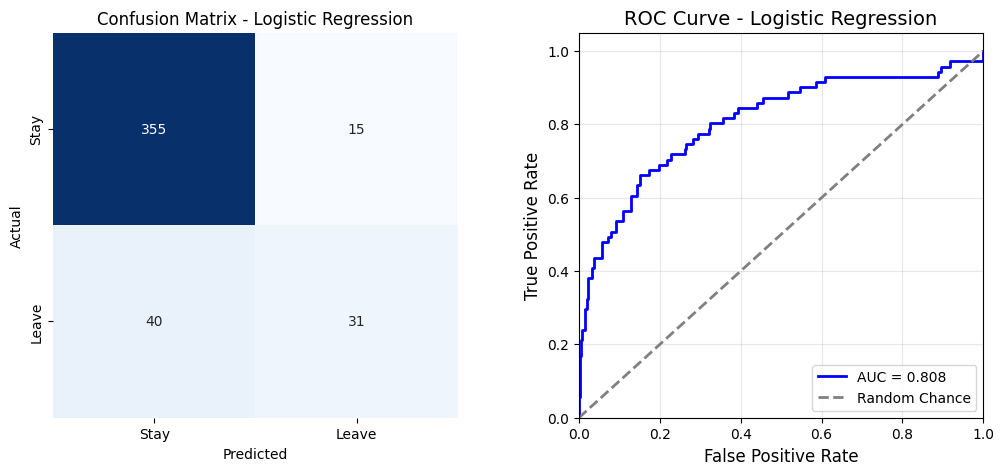

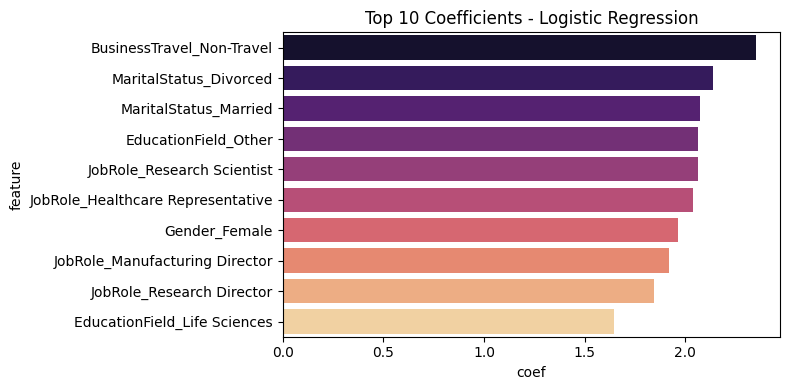




	Модель: Gaussian NB
------------------------------------------------------------
Accuracy    : 0.605
Precision   : 0.219
Recall      : 0.563
F1-score    : 0.315
Specificity : 0.614
ROC-AUC     : 0.643



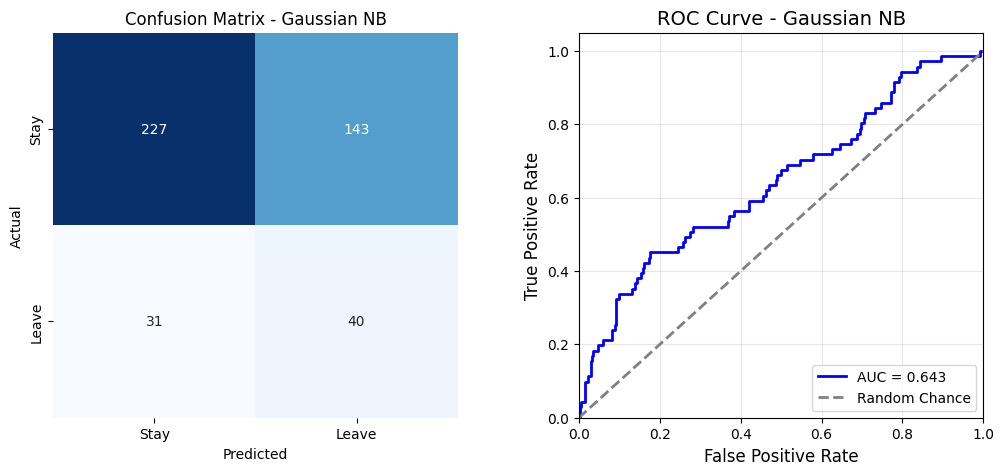


No feature importance available for Gaussian NB.



	Модель: Balanced Random Forest
------------------------------------------------------------
Accuracy    : 0.864
Precision   : 0.667
Recall      : 0.310
F1-score    : 0.423
Specificity : 0.970
ROC-AUC     : 0.757



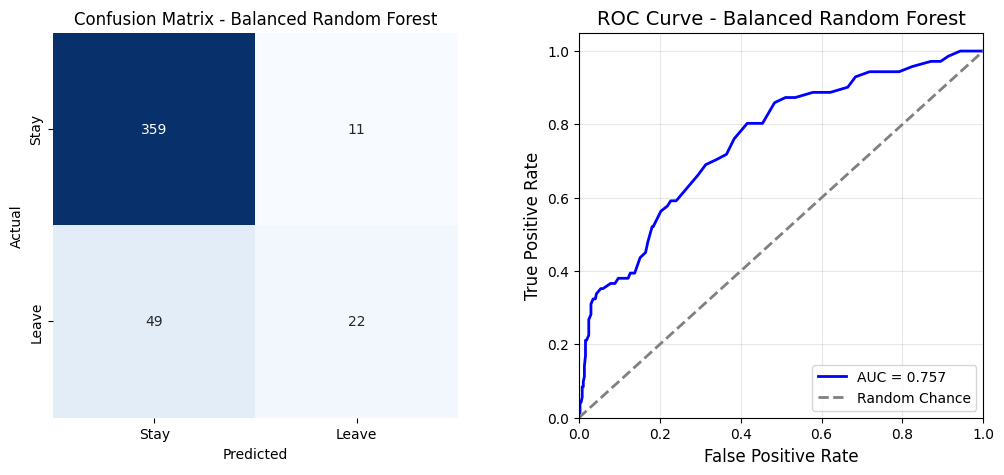

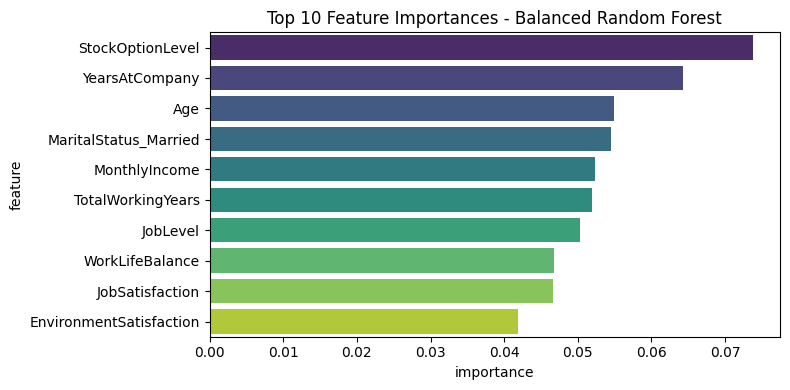




	Модель: XGBoost
------------------------------------------------------------
Accuracy    : 0.850
Precision   : 0.576
Recall      : 0.268
F1-score    : 0.365
Specificity : 0.962
ROC-AUC     : 0.742



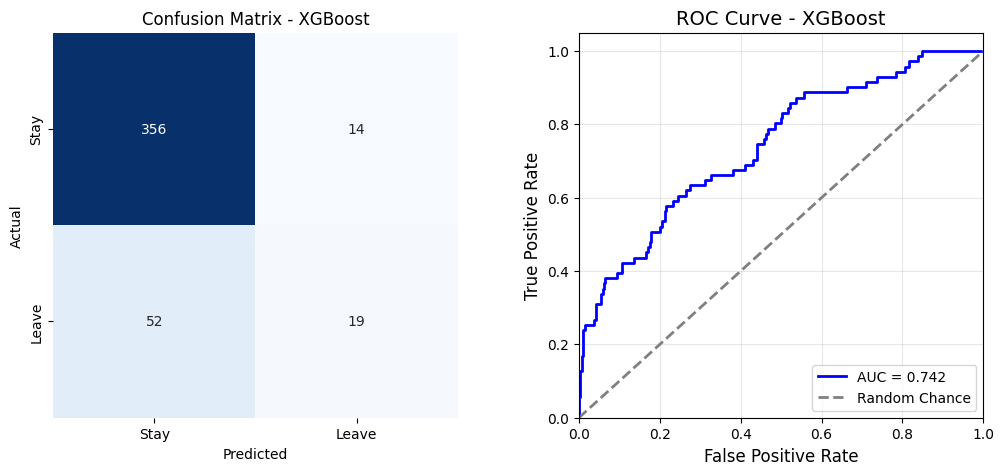

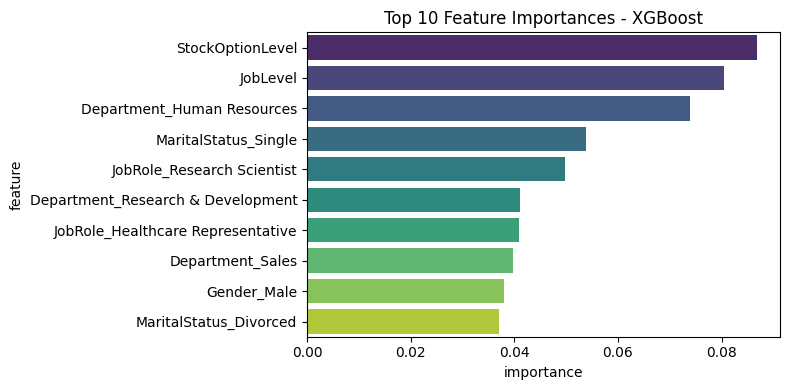




	Модель: LightGBM
------------------------------------------------------------
Accuracy    : 0.839
Precision   : 0.500
Recall      : 0.296
F1-score    : 0.372
Specificity : 0.943
ROC-AUC     : 0.746



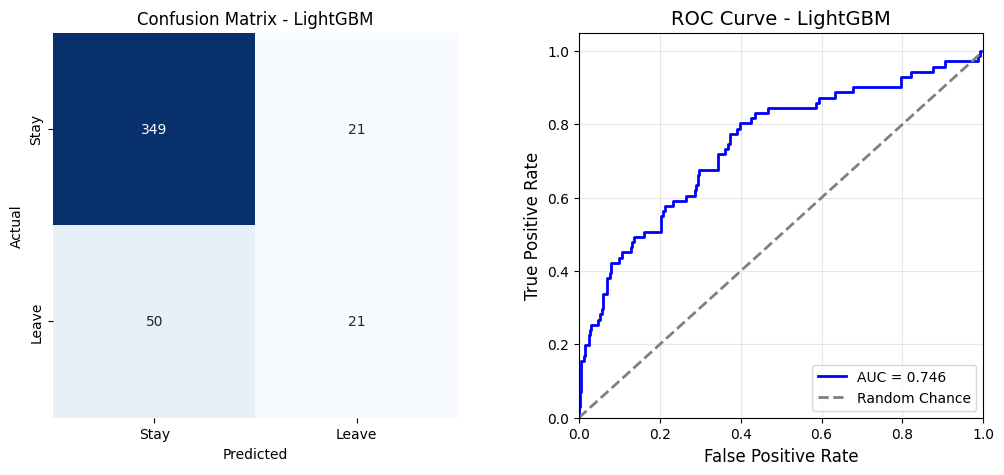

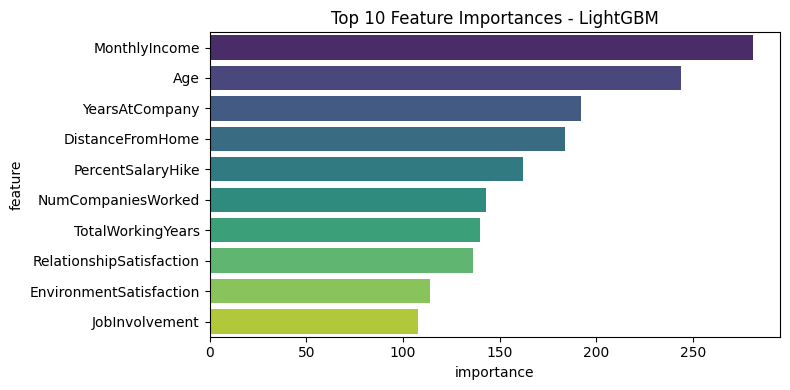




	Модель: MLP
------------------------------------------------------------
Accuracy    : 0.839
Precision   : 0.500
Recall      : 0.310
F1-score    : 0.383
Specificity : 0.941
ROC-AUC     : 0.736



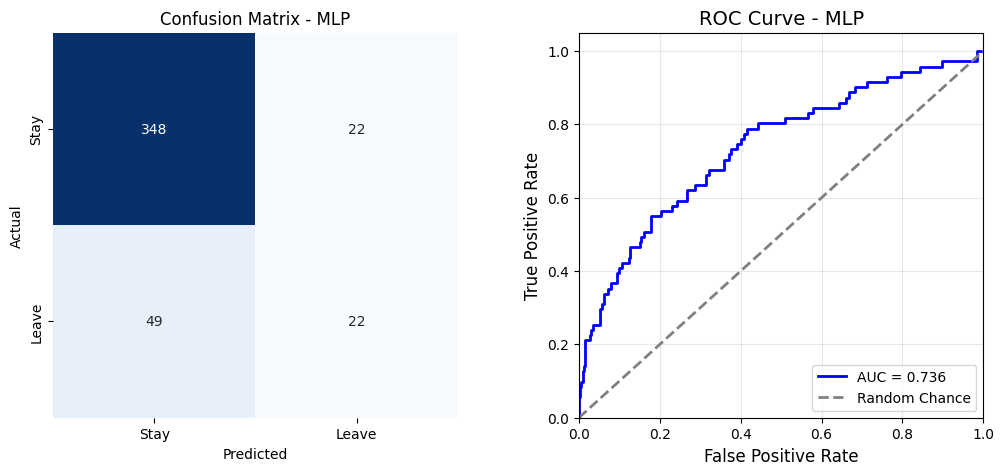


No feature importance available for MLP.



	Модель: Bagging
------------------------------------------------------------
Accuracy    : 0.819
Precision   : 0.400
Recall      : 0.254
F1-score    : 0.310
Specificity : 0.927
ROC-AUC     : 0.691



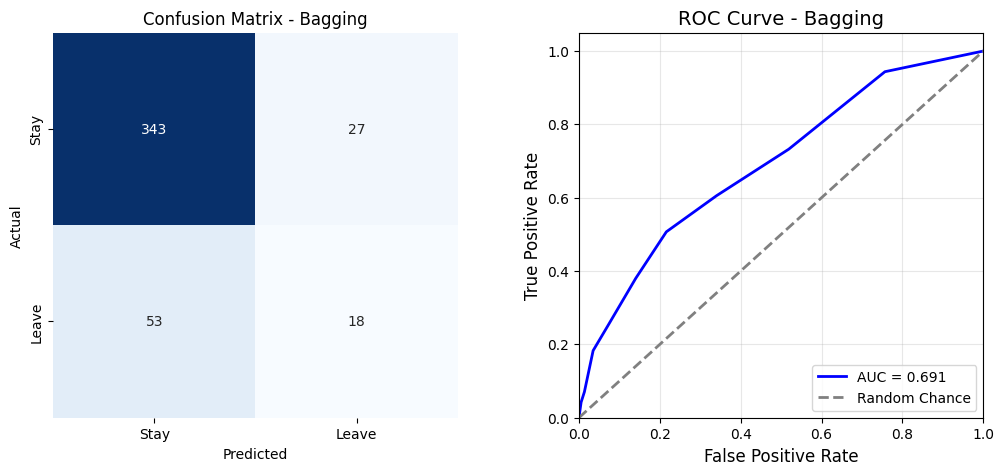


No feature importance available for Bagging.




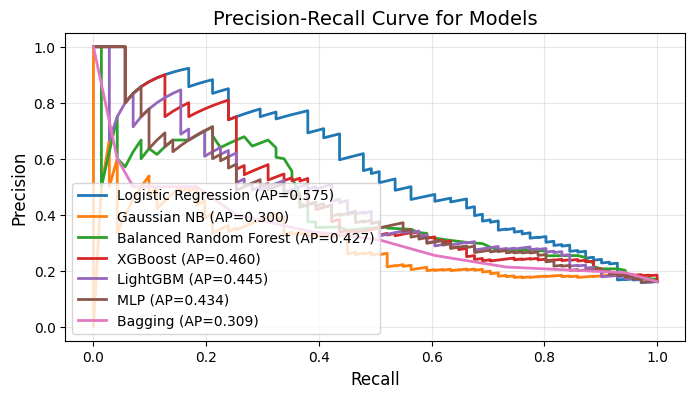

In [419]:
results_df = evaluate_models(models, X_train_res, X_test, y_train_res, y_test)

In [420]:
print(results_df)

                    Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0     Logistic Regression     0.875      0.674   0.437     0.530    0.808
2  Balanced Random Forest     0.864      0.667   0.310     0.423    0.757
4                LightGBM     0.839      0.500   0.296     0.372    0.746
3                 XGBoost     0.850      0.576   0.268     0.365    0.742
5                     MLP     0.839      0.500   0.310     0.383    0.736
6                 Bagging     0.819      0.400   0.254     0.310    0.691
1             Gaussian NB     0.605      0.219   0.563     0.315    0.643


**Logistic Regression** achieved the highest ROC-AUC (80.8 %), indicating it effectively separates "Leave" from "Stay" employees.

### **6.3.2 Evaluation on Original Training Set with Class Weights**

Let's evaluate model performance on the **original training set** using **class weights** or **built-in balancing** where supported:
- **Logistic Regression** and **LightGBM** use `class_weight='balanced'`
- **XGBoost** adjusts `scale_pos_weight` based on class imbalance
- **Balanced Random Forest** inherently balances classes during training
- **MLP** is included without additional weighting, as it does not directly support class weights.

Models with low performance (**Gaussian NB** and **Bagging**) are excluded from this analysis.

This allows us to see if weighting classes or using balanced algorithms can improve predictions **without generating synthetic samples via SMOTE**.


	Модель: Logistic Regression
------------------------------------------------------------
Accuracy    : 0.776
Precision   : 0.391
Recall      : 0.704
F1-score    : 0.503
Specificity : 0.789
ROC-AUC     : 0.814



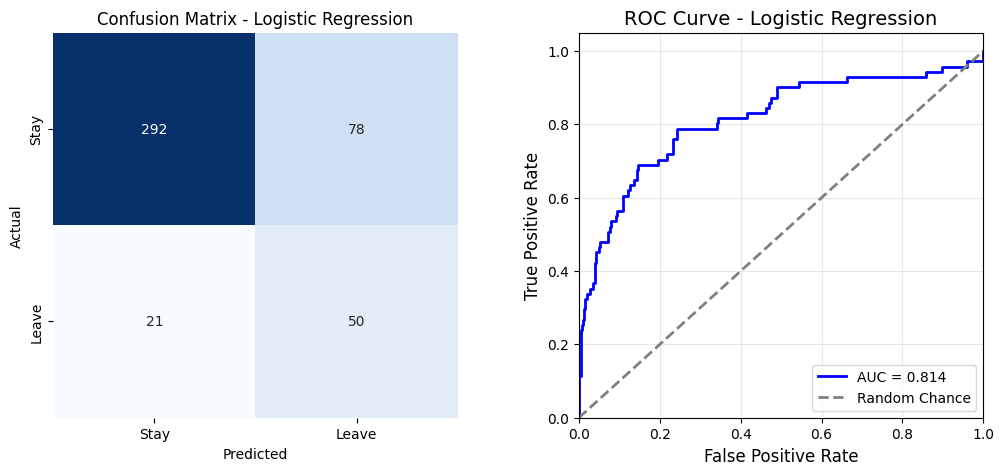

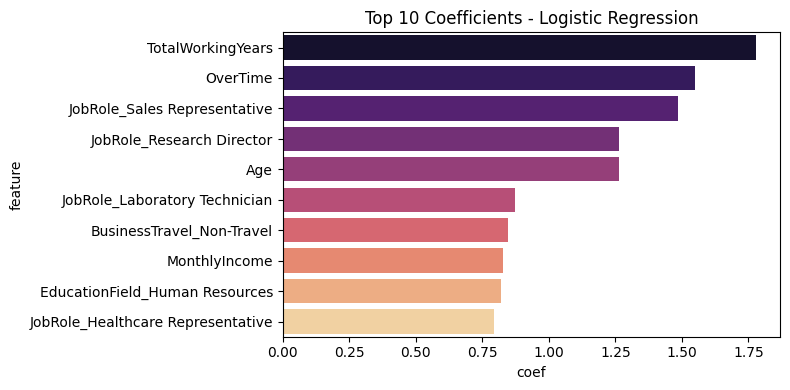




	Модель: Balanced Random Forest
------------------------------------------------------------
Accuracy    : 0.800
Precision   : 0.402
Recall      : 0.493
F1-score    : 0.443
Specificity : 0.859
ROC-AUC     : 0.764



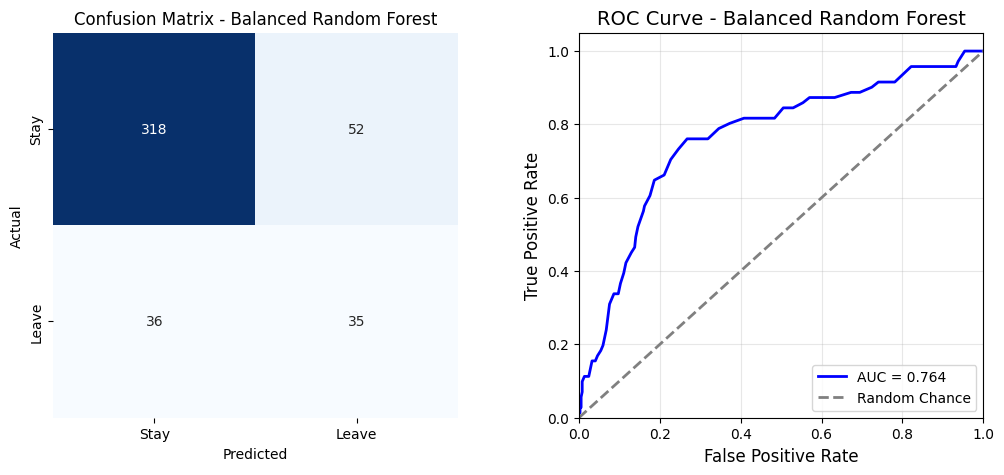

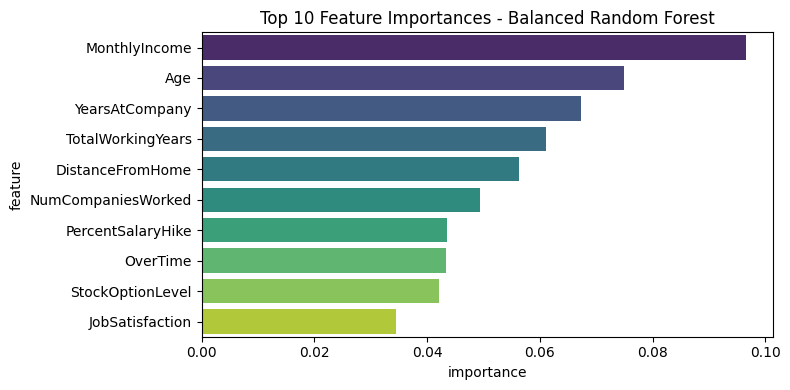




	Модель: XGBoost
------------------------------------------------------------
Accuracy    : 0.841
Precision   : 0.511
Recall      : 0.338
F1-score    : 0.407
Specificity : 0.938
ROC-AUC     : 0.732



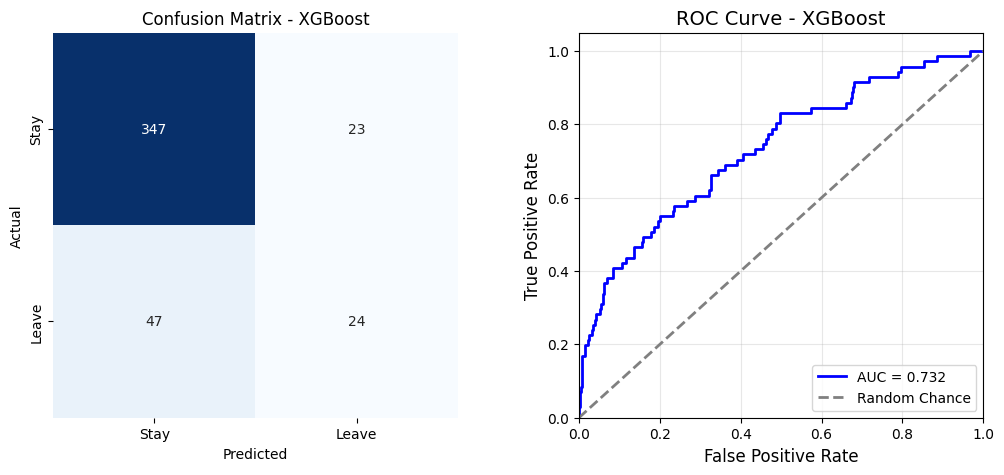

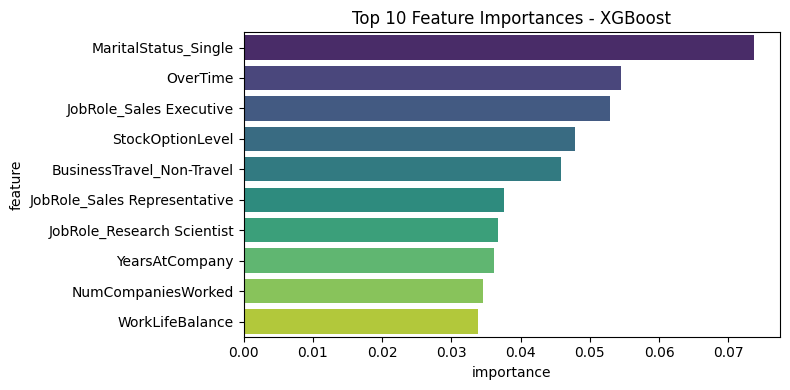




	Модель: LightGBM
------------------------------------------------------------
Accuracy    : 0.830
Precision   : 0.458
Recall      : 0.310
F1-score    : 0.370
Specificity : 0.930
ROC-AUC     : 0.770



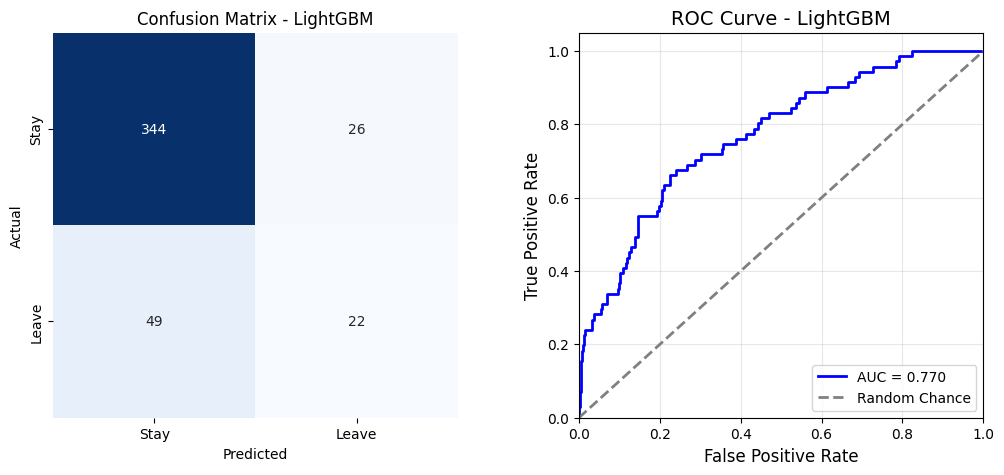

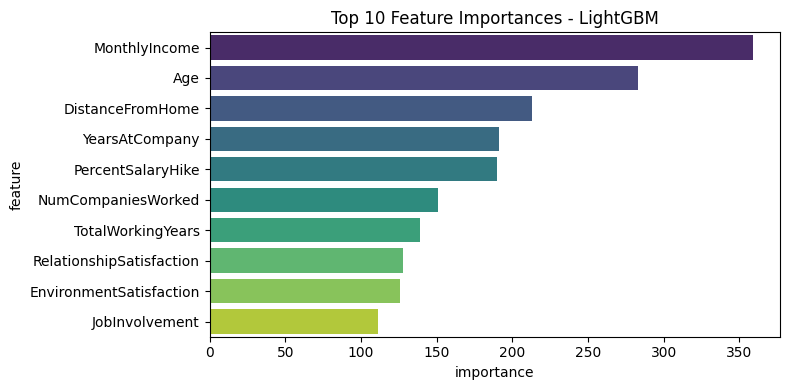




	Модель: MLP
------------------------------------------------------------
Accuracy    : 0.859
Precision   : 0.592
Recall      : 0.408
F1-score    : 0.483
Specificity : 0.946
ROC-AUC     : 0.761



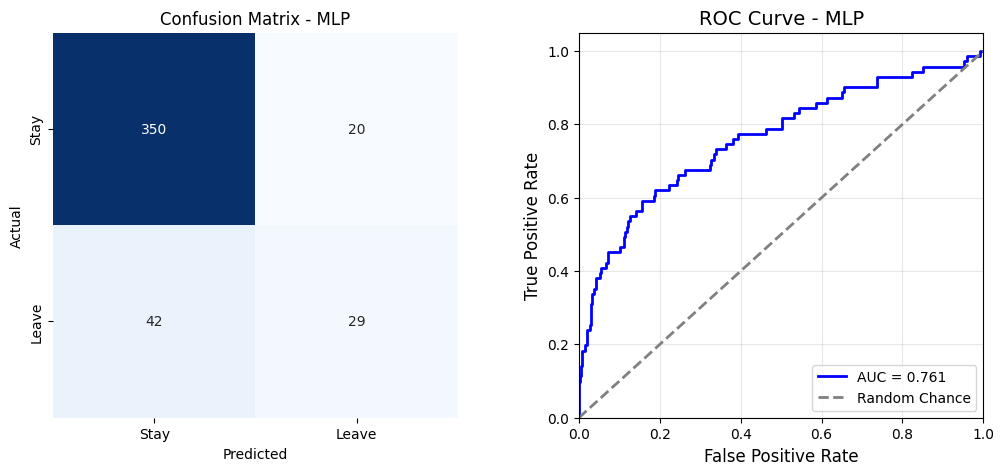


No feature importance available for MLP.




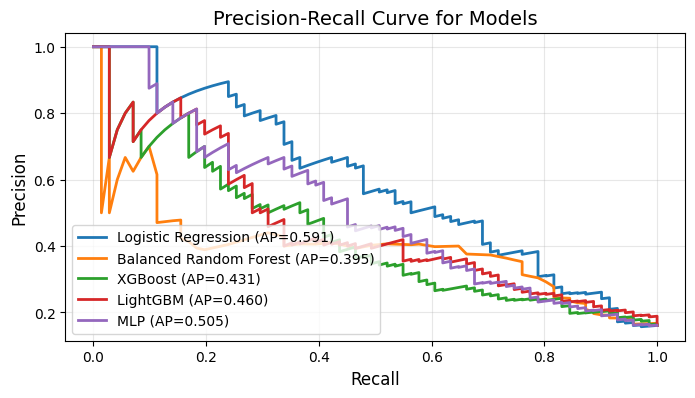

In [421]:
models_2 = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced"),
    "Balanced Random Forest": BalancedRandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, scale_pos_weight=sum(y_train == 0)/sum(y_train == 1)),
    "LightGBM": LGBMClassifier(random_state=42, verbosity=-1, class_weight="balanced"),
    'MLP':MLPClassifier(random_state=42, max_iter=1000),
}

results_df_2 = evaluate_models(
    models_2,
    X_train,
    X_test,
    y_train,
    y_test
)

In [422]:
print(results_df_2)

                    Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0     Logistic Regression     0.776      0.391   0.704     0.503    0.814
3                LightGBM     0.830      0.458   0.310     0.370    0.770
1  Balanced Random Forest     0.800      0.402   0.493     0.443    0.764
4                     MLP     0.859      0.592   0.408     0.483    0.761
2                 XGBoost     0.841      0.511   0.338     0.407    0.732


For comparison, let's also display the results from the SMOTE-balanced training set.

In [423]:
print(results_df.head(5))

                    Model  Accuracy  Precision  Recall  F1-score  ROC-AUC
0     Logistic Regression     0.875      0.674   0.437     0.530    0.808
2  Balanced Random Forest     0.864      0.667   0.310     0.423    0.757
4                LightGBM     0.839      0.500   0.296     0.372    0.746
3                 XGBoost     0.850      0.576   0.268     0.365    0.742
5                     MLP     0.839      0.500   0.310     0.383    0.736


## **6.4 Conclusions**

1. **Best Overall Model.**

Across both imbalance-handling strategies, **Logistic Regression achieved the highest ROC-AUC**.

This suggests that:
- The relationship between predictors and the target variable is largely linear and does not require highly complex nonlinear models such as deep neural networks or ensemble tree-based architectures.
- Simpler models generalize better on this dataset size (1470 rows only).

2. **Logistic Regression: SMOTE vs Class Weights.**

The logistic regression model with SMOTE appears to be slightly more conservative: it signals employee attrition less frequently, but when it does, the prediction is usually correct.

In contrast, the logistic regression model with class weights is somewhat more aggressive: it generates more attrition warnings overall, but at the cost of a higher number of false positives.

3. **Business Interpretation.**

If the priority is to identify as many potential leavers as possible (recall is critical), even at the cost of false alarms, then the logistic regression model with class weights is more appropriate.

If, however, it is important to avoid unnecessary false alarms and maintain higher precision and stability for predicting employees who will stay, then the logistic regression model with SMOTE would be the better choice.